In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
print('BEGIN')

import socket
import re
import os
import sys
import inspect
import pickle
import glob
#import sort
import datetime
import socket
import re
import os
import sys
import netCDF4
import math

print('sys.version=',sys.version)

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-3.-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'
  topdir='/OSM/CBR/OA_DCFP/work/col414/CAFEPP/CMIP6'
  topdir_vm='/OSM/CBR/OA_DCFP/data/CAFEPP'
  topdir_vm='/OSM/CBR/OA_DCFP/work/col414/CAFEPP'
  
os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

__file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import numpy as np
import numpy.ma as ma
from matplotlib.mlab import griddata
from scipy import signal
from matplotlib import pyplot as plt
from PyAstronomy import pyaC
import xarray as xr
import windspharm as wsh
import pandas as pd
import metpy.calc as mpcalc
from metpy.units import units
import matplotlib as mpl

from decadal_diag import \
  fractional_year_from_num2date, \
  generate_daily_month_indices, \
  shade_2d_latlon, \
  get_timestamp_number, \
  shade_2d_curvilinear, \
  shade_2d_simple, \
  nino_indices, \
  plot_xy, \
  fractional_year_from_num2date, \
  convert_bytes, \
  file_size, \
  compress_nc, \
  prepare_vertintp, \
  get_exitcode_stdout_stderr, \
  box_indices, \
  plot_box_indices, \
  basic_stats, \
  lagcorr, \
  turning_points, \
  plot_bar
  
from other import year_fraction, \
  leap_year, \
  get_dpm

from other import cmap_hero

from n_data_funcs import n_data_funcs
  
from doppyo import skill
from doppyo import utils
from doppyo import diagnostic
from diagnostic_doppyo_collier import Phillips_criterion, \
  potential_temperature

cafe_experiment_titles = {1:'v0_forecast', 4:'v1_forecast', 3:'v2_forecast', 9:'v1', \
  5:'v2', 6:'v3', 7:'aug17p', 2:'v1_assim', 10:'etkf', 11:'nov17n', 12:'jul18b', 13:'v0'}

fluxes_colors={'hfls':'red', 'hfss':'blue', 'rlds':'green', 'rlus':'orange', \
               'rlut':'pink', 'rsdt':'brown', 'rsus':'cyan', 'rsds':'purple', 'rsut':'grey', \
              'net down toa':'tan', 'net down surf':'yellow'}

%matplotlib inline

CRED = '\033[91m'
CEND = '\033[0m'

#print(cafe_experiment_titles[1])

print('END')

BEGIN
sys.version= 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
hostname= oa-35-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
END


In [3]:
print('BEGIN')

SWITCH_OFF=True #temporary for easy skipping of this section.
#SWITCH_OFF=False

if(not SWITCH_OFF):
  '''
  merra are written out in netcdf4, these can't be read by MFDataset so need to convert them to classic.
  Create .nc versions and deleted input .nc4 versions.
  Look into compression options.

  nccopy -k classic MERRA2_101.const_2d_ctm_Nx.00000000.nc4 MERRA2_101.const_2d_ctm_Nx.00000000.nc
  '''

  idir_merra2='/OSM/CBR/OA_DCFP/work/col414/CAFEPP/MERRA2'
  #ifil_merra2='MERRA2_?00.instM_3d_asm_Np.??????.nc4' #pressure level
  #ifil_merra2='MERRA2_?00.statM_2d_slv_Nx.??????.nc4' #single level
  #ifil_merra2='MERRA2_?00.instM_2d_lfo_Nx.??????.nc4' #land surface forcings
  #ifil_merra2='MERRA2_?00.tavgM_2d_ocn_Nx.??????.nc4' #ocean surface
  #ifil_merra2='MERRA2_?00.tavgM_2d_slv_Nx.??????.nc4'
  #ifil_merra2='MERRA2_?00.tavgM_2d_rad_Nx.??????.nc4'
  #ifil_merra2='MERRA2_?00.instM_3d_ana_Np.??????.nc4'
  #ifil_merra2='MERRA2_?00.instM_2d_asm_Nx.??????.nc4'
  #ifil_merra2='MERRA2_?00.tavgM_2d_chm_Nx.??????.nc4'
  #ifil_merra2='MERRA2_?00.tavgM_2d_lnd_Nx.??????.nc4'
  
  os.chdir(idir_merra2)

  print('Current Working Directory=',os.getcwd())

  input_files_merra2=sorted(glob.glob(idir_merra2+'/'+ifil_merra2))

  for ifil in input_files_merra2:
    ofil=ifil.split('nc4')[0]+'nc'

    command='nccopy -k classic '+ifil+' '+ofil
    print(command)

    if(not os.path.exists(ofil)):
      status, out, err = get_exitcode_stdout_stderr(command)
      if(status!=0):
        raise SystemExit('plevel_col414.bash return status:'+__file__+' line number: '+str(inspect.stack()[0][2]))

print('END')

BEGIN
END


BEGIN
n_data_funcs.init: no ensembles in this example.
calculate_filedatetime_info: case 1: no ensembles, one input file.
len(boxes)= 6
boxes= ('Ni$\\~{n}$o3.4,$^{o}C$,-5,5,190,240', 'Ni$\\~{n}$o3,$^{o}C$,-5,5,210,270', 'Ni$\\~{n}$o4,$^{o}C$,-5,5,160,210', 'Ni$\\~{n}$o1+2,$^{o}C$,-10,0,270,280', 'WTIO,$^{o}C$,-10,10,50,70', 'SETIO,$^{o}C$,-10,0,90,110')
 latmin,latmax= [-5.0, -5.0, -5.0, -10.0, -10.0, -10.0] [5.0, 5.0, 5.0, 0.0, 10.0, 0.0]  self.jmin,self.jmax= [84, 84, 84, 79, 79, 79] [95, 95, 95, 90, 100, 90]  lonmin,lonmax= [190.0, 210.0, 160.0, 270.0, 50.0, 90.0] [240.0, 270.0, 210.0, 280.0, 70.0, 110.0]  self.imin,self.imax= [189, 209, 159, 269, 49, 89] [239, 269, 209, 279, 69, 109]  actual: latmin,latmax= [-5.5 -5.5 -5.5 -10.5 -10.5 -10.5] [5.5 5.5 5.5 0.5 10.5 0.5]  actual: lonmin,lonmax= [189.5 209.5 159.5 269.5 49.5 89.5] [239.5 269.5 209.5 279.5 69.5 109.5]
calculate_quantity: value_split= ['z20']
Diag= False
monthly_clim_anom: All years have 12 months.
hadisst_monthly_nino_c

/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


color= red
lons= [190.0, 240.0, 240.0, 190.0, 190.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]
color= blue
lons= [210.0, 270.0, 270.0, 210.0, 210.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]
color= green
lons= [160.0, 210.0, 210.0, 160.0, 160.0]
lats= [-5.0, -5.0, 5.0, 5.0, -5.0]
color= red
lons= [270.0, 280.0, 280.0, 270.0, 270.0]
lats= [-10.0, -10.0, 0.0, 0.0, -10.0]
color= blue
lons= [50.0, 70.0, 70.0, 50.0, 50.0]
lats= [-10.0, -10.0, 10.0, 10.0, -10.0]
color= green
lons= [90.0, 110.0, 110.0, 90.0, 90.0]
lats= [-10.0, -10.0, 0.0, 0.0, -10.0]


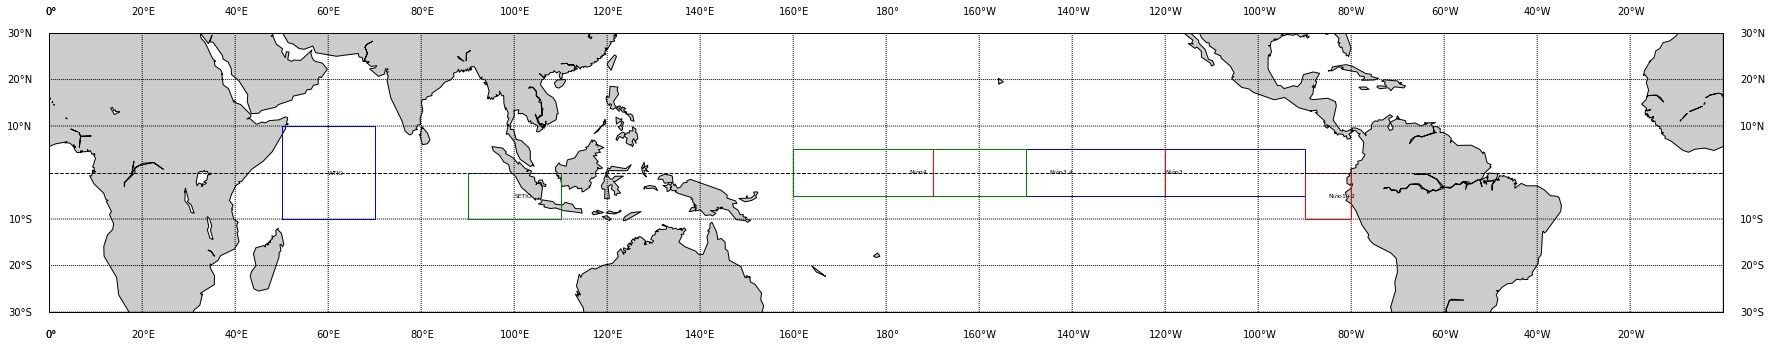

calculate_quantity: Reading data from input variable rather than file...testing
calculate_quantity: value_split= ['z20']
merra2_nino_from_monthly.shape= (465, 6)
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 3 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 39 0 465
merra2_nino_monthly_climatology_from_monthly.shape= (12, 6)
merra2_nino_monthly_anomaly_from_monthly.shape= (468, 6)


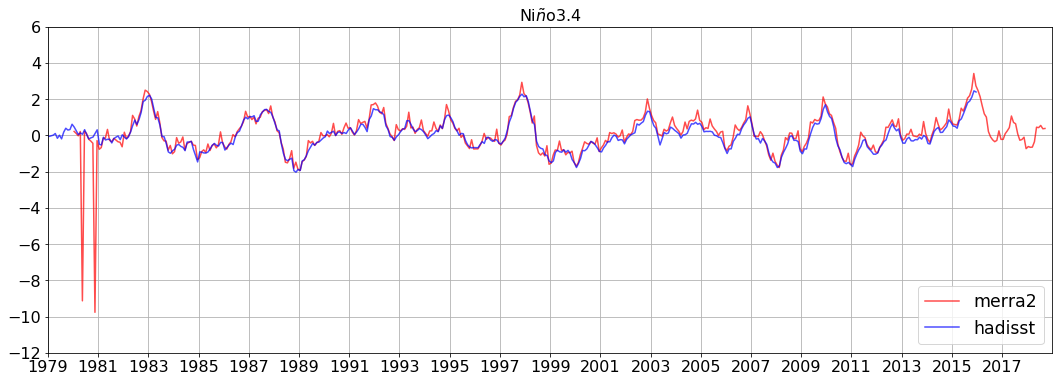

Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 3 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 39 0 465
merra2_monthly_anomaly_from_monthly_U40hPa.shape= (468, 361, 576)
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 3 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.
monthly_clim_anom: ydiff_monthly,missing_months_beg,last_month_index= 39 0 465
merra2_monthly_a

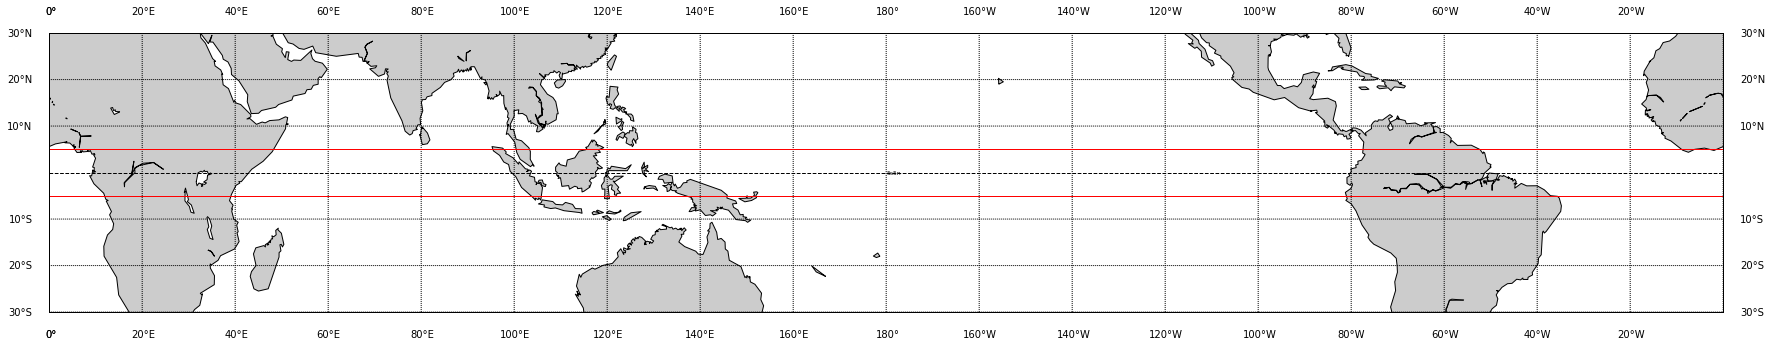

latlon_region_string= latlon_region,0,42,170,190,289,288
calculate_quantity: Reading data from input variable rather than file...testing
calculate_quantity: value_split= ['latlon_region', '0', '42', '170', '190', '289', '288']
calculate_quantity: Reading data from input variable rather than file...testing
calculate_quantity: value_split= ['latlon_region', '0', '42', '170', '190', '289', '288']
calculate_quantity: Reading data from input variable rather than file...testing
calculate_quantity: value_split= ['latlon_region', '0', '42', '170', '190', '289', '288']
merra2_llbox_from_monthly_U.shape= (465, 42, 21, 576)
Diag= False
monthly_clim_anom: There are missing months in the set. 0 at beginning and 3 at end.
monthly_clim_anom: Currently years with missing months are not used in generating long term monthly climatology.
monthly_clim_anom: And missing months will be set to missing in the final time-series.
monthly_clim_anom: Warning: missing months in last year and abeg set to last year.

In [4]:
print('BEGIN')

ifil_hadisst='/OSM/CBR/OA_DCFP/work/col414/CAFEPP/g/data/r67/CMIP5/common_restricted/CMIP5/output/Hadley/HadISST/1d/mon/ocean/Omon/r1i1p1/v20170110/tos/tos_Omon_HadISST_1d_r1i1p1_187001-201512.nc'

hadisst_monthly_files = n_data_funcs(input_files=[[ifil_hadisst]], input_var_name='tos')

hadisst_monthly_files.calculate_filedatetime_info(Diag=False, calendar='proleptic_gregorian')

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

hadisst_monthly_files.get_latlon_info(Diag=False)

hadisst_ninobox_indices = box_indices(Diag=True, \
  boxes = ( \
  'Ni$\~{n}$o3.4,$^{o}C$,-5,5,190,240',
  'Ni$\~{n}$o3,$^{o}C$,-5,5,210,270', \
  'Ni$\~{n}$o4,$^{o}C$,-5,5,160,210', \
  'Ni$\~{n}$o1+2,$^{o}C$,-10,0,270,280', \
  'WTIO,$^{o}C$,-10,10,50,70', \
  'SETIO,$^{o}C$,-10,0,90,110'), \
  instance = hadisst_monthly_files)

hadisst_monthly_nino = hadisst_monthly_files.calculate_quantity(hadisst_ninobox_indices, Diag=False, quantity='z20')

hadisst_monthly_nino_climatology, hadisst_monthly_nino_anomaly = \
  hadisst_monthly_files.monthly_clim_anom( \
  Diag=False, \
  input=hadisst_monthly_nino, \
  AnnOut=False, \
  ZeroClim=False, cbeg=1980, cend=2000 \
  )

print('hadisst_monthly_nino_climatology.shape=',hadisst_monthly_nino_climatology.shape)
print('hadisst_monthly_nino_anomaly.shape=',hadisst_monthly_nino_anomaly.shape)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
'''
problem with merra-2 is that the calendar is always set to the date of the input file. whereas normally the calendar
is the same for all input files, and the time value changes...
'''

strip_off_end=-9 #currently this would strip of months up until september of final year.

AnnOut=False
#AnnOut=True

ZeroClim=False
#ZeroClim=True

cbeg_merra2=1980
cend_merra2=2000 #2000, 1983
abeg_merra2=1980
aend_merra2=2018 #2018, 1983

mbeg_merra2=1
mend_merra2=9

merra2_time_calendar='proleptic_gregorian'
merra2_time_units='days since 1980-01-01 00:00'

idir_merra2='/OSM/CBR/OA_DCFP/work/col414/CAFEPP/MERRA2'

#ifil_merra2_2D='MERRA2_?00.statM_2d_slv_Nx.??????.nc'
ifil_merra2_2D='MERRA2_?00.tavgM_2d_ocn_Nx.??????.nc'

ifil_merra2_3D='MERRA2_?00.instM_3d_asm_Np.??????.nc'
#or
#ifil_merra2_3D='MERRA2_?00.instM_3d_ana_Np.??????.nc' #missing OMEGA


#ifil_merra2_3D='MERRA2_?00.instM_3d_asm_Np.198[0,1,2,3]??.nc'
#ifil_merra2_3D='MERRA2_?00.instM_3d_asm_Np.201???.nc'

input_files_merra2_2D=sorted(glob.glob(idir_merra2+'/'+ifil_merra2_2D))
input_files_merra2_3D=sorted(glob.glob(idir_merra2+'/'+ifil_merra2_3D))

TEST=False
if(TEST):
  for year in range(abeg_merra2,aend_merra2+1):
    if(year==abeg_merra2):
      mbeg,mend=mbeg_merra2,12
    elif(year==aend_merra2):
      mbeg,mend=1,mend_merra2
    else:
      mbeg,mend=1,12
    for month in range(mbeg,mend+1):
      ifil_merra2=glob.glob(idir_merra2+'/'+'MERRA2_?00.tavgM_2d_ocn_Nx.'+str('{0:04d}'.format(year))+str('{0:02d}'.format(month))+'.nc')
      #if(ifil_merr2==0)
      print(ifil_merra2)
      #print(len(ifil_merra2))
      if(not os.path.exists(ifil_merra2[0])):
        print('Missing: '+ifil_merra2)
    
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
   
#input_files_merra2_3D=input_files_merra2_3D[:strip_off_end]

#print('input_files_merra2_3D=',input_files_merra2_3D)

# merra2_monthly_files = n_data_funcs(Diag=False, input_files=[input_files_merra2_3D], input_var_name='U')

# merra2_monthly_files.calculate_filedatetime_info(Diag=False, calendar=merra2_time_calendar, units=merra2_time_units)
  
# merra2_monthly_files.get_latlon_info(Diag=False)

# merra2_monthly_files.get_lev_info(lev='lev')

# #'10s10n,m,-10,10,0,360'
            
# merra2_llbox_from_monthly = merra2_monthly_files.calculate_quantity('dummy', \
#   Diag=True, \
#   quantity=latlon_region_string)

# print('merra2_llbox_from_monthly.shape=',merra2_llbox_from_monthly.shape)

# raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
                                                                    
# merra2_llbox_monthly_climatology_from_monthly, merra2_llbox_monthly_anomaly_from_monthly = \
#   merra2_monthly_files.monthly_clim_anom( \
#   Diag=False, \
#   input=merra2_llbox_from_monthly, \
#   AnnOut=AnnOut, \
#   ZeroClim=ZeroClim)
  
# print('merra2_llbox_monthly_anomaly_from_monthly.shape=',merra2_llbox_monthly_anomaly_from_monthly.shape)

# raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

time_stamp_beg=[]
time_stamp_end=[]
for year in range(abeg_merra2,aend_merra2+1):
  if(year==abeg_merra2):
    mbeg=1
    mend=12
  elif(year==aend_merra2):
    mbeg=1
    mend=mend_merra2
  else:
    mbeg=1
    mend=12    
  for month in range(mbeg,mend+1):
    #print('year,month=',year,month)
    time_stamp_beg.append(datetime.datetime(year,month,1,1) + datetime.timedelta(hours=0.0))
    if(month==12):
      time_stamp_end.append(datetime.datetime(year+1,1,1) + datetime.timedelta(hours=0.0))
    else:
      time_stamp_end.append(datetime.datetime(year,month+1,1) + datetime.timedelta(hours=0.0))
    
time_beg = netCDF4.date2num(time_stamp_beg, merra2_time_units, merra2_time_calendar)
time_end = netCDF4.date2num(time_stamp_end, merra2_time_units, merra2_time_calendar)
time_avg = (time_beg+time_end)/2.0
date_time_stamps = netCDF4.num2date(time_avg, merra2_time_units, merra2_time_calendar)
num_time_values = netCDF4.date2num(date_time_stamps, merra2_time_units, merra2_time_calendar)
year_fraction_anomaly = fractional_year_from_num2date(date_time_stamps, merra2_time_calendar)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

# AnnOut=False
# #AnnOut=True

# ZeroClim=False
# #ZeroClim=True

# #print('plev_cnt,plev=',plev_cnt,plev)

# if('merra2_ifhN_2D' in locals()):
#   merra2_ifhN_2D.close()
  
# if('merra2_ifhN_3D' in locals()):
#   merra2_ifhN_3D.close()

merra2_ifhN_2D = netCDF4.MFDataset(input_files_merra2_2D, 'r')
merra2_from_monthly_TSKINWTR = merra2_ifhN_2D.variables['TSKINWTR'][:]
merra2_ifhN_2D.close()
  
merra2_ifhN_3D = netCDF4.MFDataset(input_files_merra2_3D, 'r')

#merra2_from_monthly_TLML = merra2_ifhN_2D.variables['TLML'][:]

merra2_from_monthly_T = merra2_ifhN_3D.variables['T'][:]
merra2_from_monthly_U = merra2_ifhN_3D.variables['U'][:]
merra2_from_monthly_V = merra2_ifhN_3D.variables['V'][:]
merra2_from_monthly_OMEGA = merra2_ifhN_3D.variables['OMEGA'][:]
merra2_from_monthly_O3 = merra2_ifhN_3D.variables['O3'][:]
merra2_from_monthly_PS = merra2_ifhN_3D.variables['PS'][:]

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

merra2_monthly_files = n_data_funcs(Diag=False, \
                                    input_files=None, \
                                    input_var_name=None, \
                                    dummy_mode=(False, date_time_stamps, \
                                    num_time_values, \
                                    merra2_time_units, \
                                    merra2_time_calendar))

merra2_monthly_files.lat = merra2_ifhN_3D.variables['lat'][:]
merra2_monthly_files.nlat = merra2_monthly_files.lat.size
merra2_monthly_files.lon = merra2_ifhN_3D.variables['lon'][:]
merra2_monthly_files.nlon = merra2_monthly_files.lon.size
merra2_monthly_files.lev = merra2_ifhN_3D.variables['lev'][:]
merra2_monthly_files.nlev = merra2_monthly_files.lev.size

merra2_ifhN_3D.close()

merra2_monthly_files.rad = 4.0*math.atan(1.0)/180.0
merra2_monthly_files.clat = np.abs(np.cos(merra2_monthly_files.lat[:]*merra2_monthly_files.rad))

merra2_monthly_files.nfiles = 1 #non-ensembles

# raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

# U40hPa,levs.index(4000)
# (465, 42, 361, 576)

merra2_ninobox_indices=box_indices(Diag=True, \
  boxes=( \
  'Ni$\~{n}$o3.4,$^{o}C$,-5,5,190,240',
  'Ni$\~{n}$o3,$^{o}C$,-5,5,210,270', \
  'Ni$\~{n}$o4,$^{o}C$,-5,5,160,210', \
  'Ni$\~{n}$o1+2,$^{o}C$,-10,0,270,280', \
  'WTIO,$^{o}C$,-10,10,50,70', \
  'SETIO,$^{o}C$,-10,0,90,110'), \
  instance=merra2_monthly_files)

plot_box_indices(latmin=merra2_ninobox_indices.latmin, \
                 latmax=merra2_ninobox_indices.latmax, \
                 lonmin=merra2_ninobox_indices.lonmin, \
                 lonmax=merra2_ninobox_indices.lonmax, \
                 labs=merra2_ninobox_indices.boxes_labs, \
                  colors=['red','blue','green','red','blue','green','pink','orange'])

# merra2_nino_from_monthly=merra2_monthly_files.calculate_quantity('dummy', \
#                 Diag=True, \
#                 input=merra2_from_monthly_TLML, \
#                 quantity='latlon_region,1,10,1,10')

merra2_nino_from_monthly=merra2_monthly_files.calculate_quantity(merra2_ninobox_indices, \
                Diag=False, \
                input=merra2_from_monthly_TSKINWTR, \
                quantity='z20')

print('merra2_nino_from_monthly.shape=',merra2_nino_from_monthly.shape)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

merra2_nino_monthly_climatology_from_monthly, merra2_nino_monthly_anomaly_from_monthly = \
  merra2_monthly_files.monthly_clim_anom( \
  Diag=False, \
  input=merra2_nino_from_monthly, \
  AnnOut=AnnOut, \
  ZeroClim=ZeroClim, \
  abeg=abeg_merra2, \
  aend=aend_merra2, \
  cbeg=cbeg_merra2, \
  cend=cend_merra2 \
  )

print('merra2_nino_monthly_climatology_from_monthly.shape=',merra2_nino_monthly_climatology_from_monthly.shape)
print('merra2_nino_monthly_anomaly_from_monthly.shape=',merra2_nino_monthly_anomaly_from_monthly.shape)

xysize=(18,6)

xticks=range(abeg_merra2-1,aend_merra2+1,2)
xlim=[abeg_merra2-1,aend_merra2+1]

indice_nino_choice=0

plot_xy(Diag=False, \
        input_data=(merra2_nino_monthly_anomaly_from_monthly[:,indice_nino_choice], hadisst_monthly_nino_anomaly[:,indice_nino_choice]), \
        input_xvals=(merra2_monthly_files.year_fraction_anomaly, hadisst_monthly_files.year_fraction_anomaly), \
        grid=True, \
        title=hadisst_ninobox_indices.boxes_labs[indice_nino_choice], \
        units='K', \
        xysize=xysize, \
        xticks=xticks, \
        xlim=xlim, \
        line_colors=['red','blue'], \
        line_labels=['merra2','hadisst'], \
        line_styles=['-','-'] \
       )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

levs=(merra2_monthly_files.lev*100).astype(int).tolist()

merra2_monthly_climatology_from_monthly_U40hPa, merra2_monthly_anomaly_from_monthly_U40hPa = merra2_monthly_files.monthly_clim_anom( \
    Diag=False, input=merra2_from_monthly_U[:,levs.index(4000),:,:], AnnOut=AnnOut, ZeroClim=ZeroClim, \
    abeg=abeg_merra2, aend=aend_merra2, cbeg=cbeg_merra2, cend=cend_merra2)

print('merra2_monthly_anomaly_from_monthly_U40hPa.shape=',merra2_monthly_anomaly_from_monthly_U40hPa.shape)

merra2_monthly_climatology_from_monthly_Uzon, merra2_monthly_anomaly_from_monthly_Uzon = merra2_monthly_files.monthly_clim_anom( \
    Diag=False, input=np.average(merra2_from_monthly_U[:,:,:,:],axis=-1), AnnOut=AnnOut, ZeroClim=ZeroClim, \
    abeg=abeg_merra2, aend=aend_merra2, cbeg=cbeg_merra2, cend=cend_merra2)

print('merra2_monthly_anomaly_from_monthly_U40hPa.shape=',merra2_monthly_anomaly_from_monthly_U40hPa.shape)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#5s5n,ms-1,-5,5,0,360
#45s45n,ms-1,-45,45,0,360
#5s5n,ms-1,-5,5,160,280
#5s5n,ms-1,-5,5,0,160

merra2_llbox_indices=box_indices(Diag=True, \
    boxes=('5s5n,ms-1,-5,5,0,360',), \
    instance=merra2_monthly_files)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

# var_lats=merra2_monthly_files.lat, \
# var_lons=merra2_monthly_files.lon, \
  
plot_box_indices(latmin=merra2_llbox_indices.latmin, \
                 latmax=merra2_llbox_indices.latmax, \
                 lonmin=merra2_llbox_indices.lonmin, \
                 lonmax=merra2_llbox_indices.lonmax, \
                 labs=merra2_llbox_indices.boxes_labs, \
                  colors=['red','blue','green','red','blue','green','pink','orange'])

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

latlon_region_string='latlon_region,0,' \
  +str(merra2_monthly_files.nlev)+ \
  ','+str(merra2_llbox_indices.jmin[0])+ \
  ','+str(merra2_llbox_indices.jmax[0])+ \
  ','+str(merra2_llbox_indices.imin[0]) \
  +','+str(merra2_llbox_indices.imax[0])

print('latlon_region_string=',latlon_region_string)       

merra2_llbox_from_monthly_U = merra2_monthly_files.calculate_quantity('dummy', \
  Diag=False, \
  input=merra2_from_monthly_U, \
  quantity=latlon_region_string)

merra2_llbox_from_monthly_OMEGA = merra2_monthly_files.calculate_quantity('dummy', \
  Diag=False, \
  input=merra2_from_monthly_OMEGA, \
  quantity=latlon_region_string)

merra2_llbox_from_monthly_O3 = merra2_monthly_files.calculate_quantity('dummy', \
  Diag=False, \
  input=merra2_from_monthly_O3, \
  quantity=latlon_region_string)

print('merra2_llbox_from_monthly_U.shape=',merra2_llbox_from_monthly_U.shape)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

merra2_llbox_monthly_climatology_from_monthly_U, merra2_llbox_monthly_anomaly_from_monthly_U = merra2_monthly_files.monthly_clim_anom( \
    Diag=False, input=merra2_llbox_from_monthly_U, AnnOut=AnnOut, ZeroClim=ZeroClim, \
    abeg=abeg_merra2, aend=aend_merra2, cbeg=cbeg_merra2, cend=cend_merra2)

merra2_llbox_monthly_climatology_from_monthly_OMEGA, merra2_llbox_monthly_anomaly_from_monthly_OMEGA = merra2_monthly_files.monthly_clim_anom( \
    Diag=False, input=merra2_llbox_from_monthly_OMEGA, AnnOut=AnnOut, ZeroClim=ZeroClim, \
    abeg=abeg_merra2, aend=aend_merra2, cbeg=cbeg_merra2, cend=cend_merra2)

merra2_llbox_monthly_climatology_from_monthly_O3, merra2_llbox_monthly_anomaly_from_monthly_O3 = merra2_monthly_files.monthly_clim_anom( \
    Diag=False, input=merra2_llbox_from_monthly_O3, AnnOut=AnnOut, ZeroClim=ZeroClim, \
    abeg=abeg_merra2, aend=aend_merra2, cbeg=cbeg_merra2, cend=cend_merra2)

print('merra2_llbox_monthly_anomaly_from_monthly_U.shape=',merra2_llbox_monthly_anomaly_from_monthly_U.shape)
print('merra2_llbox_monthly_climatology_from_monthly_U.shape=',merra2_llbox_monthly_climatology_from_monthly_U.shape)

print('END')

BEGIN
Pcr= <xarray.DataArray (lat: 361, lon: 576)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [ 0.482296,  0.454729,  0.426782, ...,  0.564908,  0.537497,  0.509846],
       [ 0.171557,  0.151948,  0.132313, ...,  0.229972,  0.21063 ,  0.191069],
       [-0.349482, -0.36126 , -0.373146, ..., -0.313897, -0.326016, -0.337706]])
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Attributes:
    units:      m s^-1
    long_name:  Philips criterion
Pcr_plot= [[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan

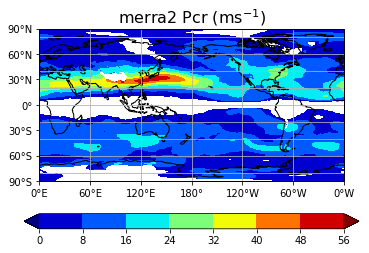

END


In [28]:
print('BEGIN')

# def potential_temperature(p, t, lat_name=None, lon_name=None):
#   """
#       Returns the potential temperature
#       Author: Mark Collier
#       Date: 26/11/2018
      
#       Parameters
#       ----------
#       p : pressure level
      
#       t : xarray DataArray
#           Array containing fields of temperature (Kelvin) with at least coordinates latitude, longitude and
#           level (following standard naming - see Limitations)

#       Returns
#       -------
#       potential_temperature : xarray DataArray
#         Array containing potential temperature (Kelvin)
        
#       Examples
#       --------
      
#       temperature = xr.DataArray(np.random.normal(size=(6,4)), \
#         coords=[('lat', np.arange(-75,76,30)), ('lon', np.arange(45,316,90))])

#       potential_temperature = potential_temperature(300, temperature)

#       Limitations
#       -----------

#       see: https://www.ncl.ucar.edu/Document/Functions/Contributed/pot_temp.shtml
      
#       All input array coordinates must follow standard naming (see doppyo.utils.get_lat_name(), 
#       doppyo.utils.get_lon_name(), etc)
        
#       To Do
#       -----
      
#   """

#   p0 = 1000
#   pt = pow(t * (p0 /p ), 0.286)
#   pt.attrs['units'] = 'kelvin'
#   pt.attrs['long_name'] = 'Potential temperature'
#   return pt

# def Phillips_criterion(u300, u700, pt300, pt700, lat_name=None, lon_name=None):
#   """
#       Returns the Phillips criterion
#       Author: Mark Collier
#       Date: 26/11/2018
      
#       Parameters
#       ----------
#       u300 : xarray DataArray
#           Array containing fields of zonal velocity @300hPa with at least coordinates latitude, longitude and
#           level (following standard naming - see Limitations)

#       u700 : xarray DataArray
#           Array containing fields of zonal velocity @700hPa with at least coordinates latitude, longitude and
#           level (following standard naming - see Limitations)
          
#       pt300 : xarray DataArray
#           Array containing fields of potential temperature @300hPa (Kelvin) with at least coordinates latitude, longitude and
#           level (following standard naming - see Limitations)

#       pt700 : xarray DataArray
#           Array containing fields of potential temperature @700hPa (Kelvin) with at least coordinates latitude, longitude and
#           level (following standard naming - see Limitations)

#       Returns
#       -------
#       Pcr : xarray DataArray
#         Array containing the Phillips Criterion (m/s). Normally look at values >=0, ill defined near equator.
        
#       Examples
#       --------
      
#       u = xr.DataArray(np.random.normal(size=(24,5,6,4)), \
#         coords=[('time', pd.date_range('2000-01-01',periods=24,freq='M')), \
#                 ('level', [100,300,700,900,1000]), \
#                 ('lat', np.arange(-75,76,30)), \
#                 ('lon', np.arange(45,316,90)), \
#                 ])

#       t = xr.DataArray(np.random.normal(size=(24,5,6,4))+273.15, \
#         coords=[('time', pd.date_range('2000-01-01',periods=24,freq='M')), \
#                 ('level', [100,300,700,900,1000]), \
#                 ('lat', np.arange(-75,76,30)), \
#                 ('lon', np.arange(45,316,90)), \
#                 ])

#       Pcr = Phillips_criterion(u.sel(level=300), u.sel(level=700), potential_temperature(300, t.sel(level=300)), potential_temperature(700, t.sel(level=700)))

#       Limitations
#       -----------

#       All input array coordinates must follow standard naming (see doppyo.utils.get_lat_name(), 
#       doppyo.utils.get_lon_name(), etc)

#       see pages 88+: https://books.google.com.au/books?id=WweaWERxDGMC&pg=PA92&lpg=PA92&dq=Phillips+criterion&source=bl&ots=IVdKSChaNQ&sig=LdAHb6PhWJEau1qYYeQiXgm7BG4&hl=en&sa=X&ved=2ahUKEwi44bSCuPHeAhUBfCsKHYdpDwI4ChDoATADegQIBhAB#v=onepage&q=Phillips%20criterion&f=false
      
#       To Do
#       -----
      
#   """
#   degtorad = utils.constants().pi / 180
  
#   if lat_name is None:
#     lat_name = utils.get_lat_name(u300)
#   if lon_name is None:
#     lon_name = utils.get_lon_name(u300)

#   bk = 0.124 #dimensionless constant
#   Cp = 1004 #J deg-1 kg-1
#   sigma_bar = 1/(2*(pt300 - pt700)) #pt in C or K.
#   earth_radius = 6.371e6 #m utils.constants().R_earth
#   gamma = 7.292e-5 #rad s-1
  
#   # critical_vertical_wind_shear_for_instability:
#   critical = \
#     ((bk * Cp * sigma_bar) / (earth_radius * gamma)) * \
#     ((xr.ufuncs.cos(u300[lat_name] * degtorad))) / xr.ufuncs.square(xr.ufuncs.sin(u300[lat_name] * degtorad)) \

#   Pcr = u300 - u700 - critical #defined for values >= 0.0
  
#   Pcr.attrs['units'] = 'm s^-1'
#   Pcr.attrs['long_name'] = 'Philips criterion'
#   return Pcr

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

levs=(merra2_monthly_files.lev*100).astype(int).tolist()

u300 = xr.DataArray(merra2_from_monthly_U[0,levs.index(30000),:,:], \
  coords=[('lat', merra2_monthly_files.lat), ('lon', merra2_monthly_files.lon)])


#data = u300.metpy.parse_cf()

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

u700 = xr.DataArray(merra2_from_monthly_U[0,levs.index(70000),:,:], \
  coords=[('lat', merra2_monthly_files.lat), ('lon', merra2_monthly_files.lon)])

t300 = xr.DataArray(merra2_from_monthly_T[0,levs.index(30000),:,:], \
  coords=[('lat', merra2_monthly_files.lat), ('lon', merra2_monthly_files.lon)])

t700 = xr.DataArray(merra2_from_monthly_T[0,levs.index(70000),:,:], \
  coords=[('lat', merra2_monthly_files.lat), ('lon', merra2_monthly_files.lon)])
                    
#t700.attrs['units'] = b

pt300 = potential_temperature(300, t300)
pt700 = potential_temperature(700, t700)
  
#print('t700=',t700)
#j = mpcalc.potential_temperature(700., t700)
#mpcalc.potential_temperature(300. * units.mbar, 300 * units.kelvin).to(units.celsius) #this works, convert output into degC
#j = mpcalc.potential_temperature(700. * units.mbar, t700)
#j = mpcalc.potential_temperature(700. * units.mbar, t700 * units.kelvin)
#j = mpcalc.potential_temperature(800. * units.mbar, 273. * units.kelvin)

#print('j=',j)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

Pcr = Phillips_criterion(u300, u700, pt300, pt700) # - Phillips_criterion(u300, u700, t300, t700)

Pcr_plot = np.where(Pcr >= 0, Pcr, np.nan)

print('Pcr=',Pcr)
print('Pcr_plot=',Pcr_plot)

clevs=None

shade_2d_latlon( \
  Pcr_plot, \
  xysize=xysize, \
  xyvals=(u300['lon'], u300['lat']), \
  title='merra2 Pcr', \
  units='$m s^{-1}$', \
  clevs=clevs)

print('END')

In [ ]:
print('BEGIN')

u = xr.DataArray(np.random.normal(size=(24,5,6,4)), \
  coords=[('time', pd.date_range('2000-01-01',periods=24,freq='M')), \
          ('level', [100,300,700,900,1000]), \
          ('lat', np.arange(-75,76,30)), \
          ('lon', np.arange(45,316,90)), \
          ])

t = xr.DataArray(np.random.normal(size=(24,5,6,4))+273.15, \
  coords=[('time', pd.date_range('2000-01-01',periods=24,freq='M')), \
          ('level', [100,300,700,900,1000]), \
          ('lat', np.arange(-75,76,30)), \
          ('lon', np.arange(45,316,90)), \
          ])

Pcr = Phillips_criterion(u.sel(level=300), u.sel(level=700), potential_temperature(300, t.sel(level=300)), potential_temperature(700, t.sel(level=700)))

print('Pcr=',Pcr)

xysize=(6,4)

shade_2d_latlon( \
  Pcr[0,], \
  xysize=xysize, \
  xyvals=(u['lon'], u['lat']), \
  title='merra2 Pcr', \
  units='$m s^{-1}$', \
  clevs=clevs)
  
print('END')

BEGIN
merra2_monthly_files.lev[levs_selection]= [700.0 500.0 300.0 200.0 100.0 40.0]
len(boxes)= 1
boxes= ('90s90n,ms-1,-90,90,0,360',)
 latmin,latmax= [-90.0] [90.0]  self.jmin,self.jmax= [0] [360]  lonmin,lonmax= [0.0] [360.0]  self.imin,self.imax= [289] [288]  actual: latmin,latmax= [-90.0] [90.0]  actual: lonmin,lonmax= [0.625] [-5.920304394294029e-13]


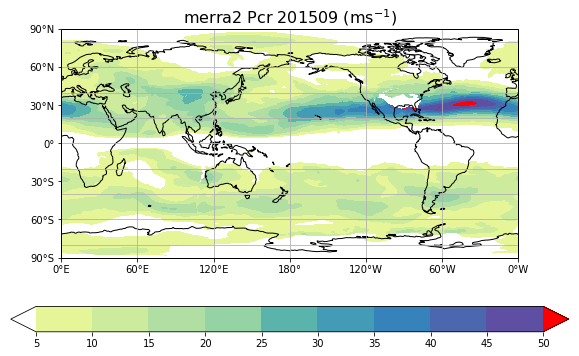

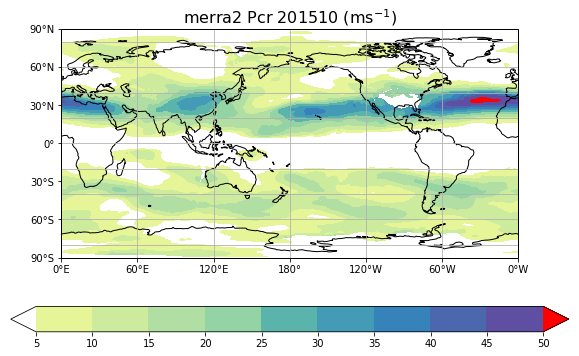

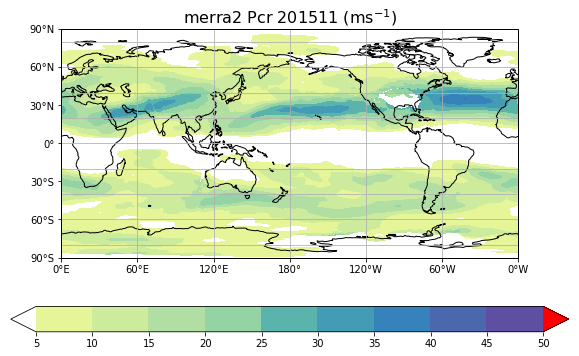

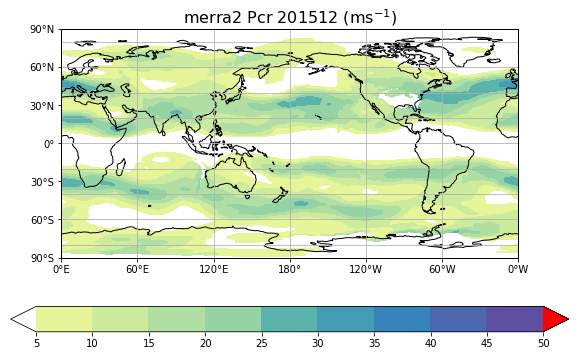

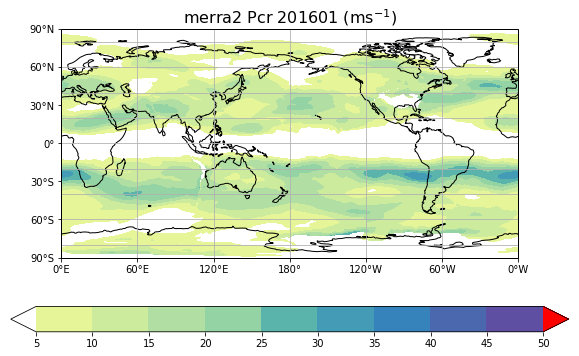

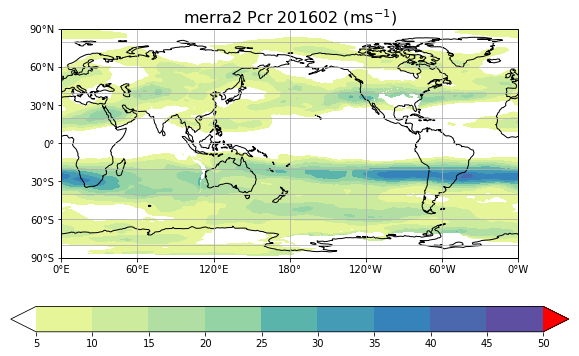

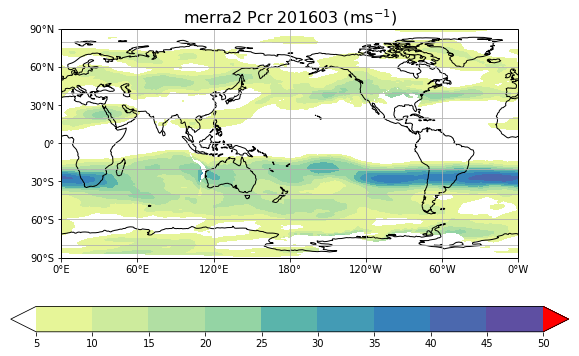

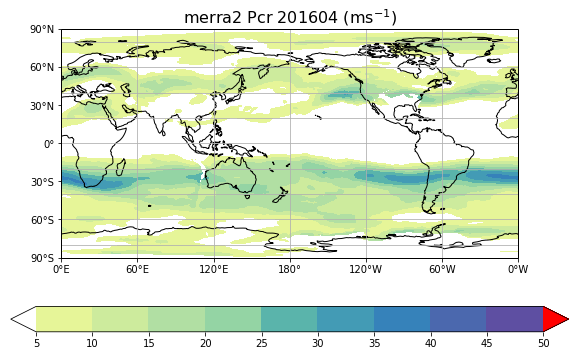

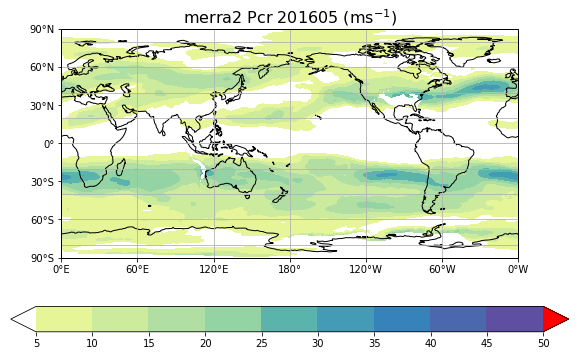

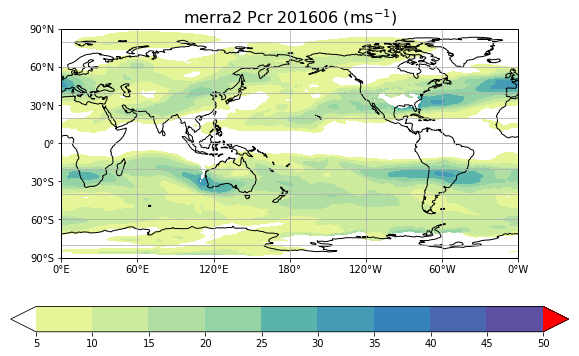

END


In [34]:
print('BEGIN')

FreshStart=True
FreshStart=False #turn off initialisation/creation of certain big/timely data objects to speed up.

merra2_time_calendar='proleptic_gregorian'
merra2_time_units='days since 1980-01-01 00:00'

levs_selection=[12, 16, 20, 22, 24, 27]

ybeg,yend=2013,2018+1

merra2_year_fraction = year_fraction(merra2_monthly_files.date_time_stamp_tfreq[0].year, \
                                   merra2_monthly_files.date_time_stamp_tfreq[-1].year, \
                                   mbeg = merra2_monthly_files.date_time_stamp_tfreq[0].month, \
                                   mend = merra2_monthly_files.date_time_stamp_tfreq[-1].month)

levs=(merra2_monthly_files.lev*100).astype(int).tolist()

print('merra2_monthly_files.lev[levs_selection]=',merra2_monthly_files.lev[levs_selection])

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

merra2_years_months=[]
for cnt in range(merra2_monthly_files.date_time_stamp_tfreq.size):
  merra2_years_months.append(merra2_monthly_files.date_time_stamp_tfreq[cnt].year*100+merra2_monthly_files.date_time_stamp_tfreq[cnt].month)

#print(len(merra2_years_months))
#print(merra2_from_monthly_U.shape)

dates_to_plot=((2015,9), (2015,10), (2015,11), (2015,12), (2016,1), (2016,2), (2016,3), (2016,4), (2016,5), (2016,6))

xysize=(6,4)

time_indices_to_plot=[]
for date_to_plot in dates_to_plot:
  year,month=date_to_plot
  YYYYMM='{0:04d}'.format(year)+'{0:02d}'.format(month)
  time_indices_to_plot.append(merra2_years_months.index(int(YYYYMM)))

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

merra2_llall_indices=box_indices(Diag=True, \
    boxes=('90s90n,ms-1,-90,90,0,360',), \
    instance=merra2_monthly_files)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
# plot_box_indices(latmin=merra2_llall_indices.latmin, \
#                  latmax=merra2_llall_indices.latmax, \
#                  lonmin=merra2_llall_indices.lonmin, \
#                  lonmax=merra2_llall_indices.lonmax, \
#                  labs=merra2_llall_indices.boxes_labs, \
#                   colors=['red','blue','green','red','blue','green','pink','orange'])

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

latlon_region_string='latlon_region,0,' \
  +str(merra2_monthly_files.nlev)+ \
  ','+str(merra2_llall_indices.jmin[0])+ \
  ','+str(merra2_llall_indices.jmax[0])+ \
  ','+str(merra2_llall_indices.imin[0]) \
  +','+str(merra2_llall_indices.imax[0])

# print('latlon_region_string=',latlon_region_string)       

# merra2_llall_VNlevs = merra2_monthly_files.calculate_quantity('dummy', \
#   Diag=False, \
#   input=merra2_from_monthly_V, \
#   quantity=latlon_region_string)

# merra2_llall_V = merra2_llall_VNlevs[:,:,:,:] #keep this for MMMS

# merra2_llall_VNlevs = merra2_llall_VNlevs[:,levs_selection,:,:] #select only required levels.
  
if(FreshStart):
  merra2_llall_UNlevs = merra2_monthly_files.calculate_quantity('dummy', \
    Diag=False, \
    input=merra2_from_monthly_U, \
    quantity=latlon_region_string)

  merra2_llall_UNlevs = merra2_llall_UNlevs[:,levs_selection,:,:] #select only required levels.

  merra2_llall_VNlevs = merra2_monthly_files.calculate_quantity('dummy', \
    Diag=False, \
    input=merra2_from_monthly_V, \
    quantity=latlon_region_string)

  merra2_llall_V = merra2_llall_VNlevs[:,:,:,:] #keep this for MMMS
  
  merra2_llall_VNlevs = merra2_llall_VNlevs[:,levs_selection,:,:] #select only required levels.

  merra2_llall_TNlevs = merra2_monthly_files.calculate_quantity('dummy', \
    Diag=False, \
    input=merra2_from_monthly_T, \
    quantity=latlon_region_string)

  merra2_llall_TNlevs = merra2_llall_TNlevs[:,levs_selection,:,:] #select only required levels.
  
clevs=None

# shade_2d_latlon( \
#   merra2_llall_UNlevs[0,0,:,:], \
#   xyvals=(merra2_monthly_files.lon, merra2_monthly_files.lat), \
#   title='try1', \
#   units='try2', \
#   clevs=clevs \
#   )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

ZeroClim=False

if(FreshStart):
  merra2_llall_monthly_climatology_UNlevs, merra2_llall_monthly_anomaly_UNlevs = merra2_monthly_files.monthly_clim_anom( \
      Diag=False, input=merra2_llall_UNlevs, AnnOut=AnnOut, ZeroClim=ZeroClim) #, \
  #     abeg=abeg_merra2, aend=aend_merra2, cbeg=cbeg_merra2, cend=cend_merra2)

  print('merra2_llall_monthly_anomaly_UNlevs.shape=',merra2_llall_monthly_anomaly_UNlevs.shape)

  merra2_llall_monthly_climatology_VNlevs, merra2_llall_monthly_anomaly_VNlevs = merra2_monthly_files.monthly_clim_anom( \
      Diag=False, input=merra2_llall_VNlevs, AnnOut=AnnOut, ZeroClim=ZeroClim) #, \
  #     abeg=abeg_merra2, aend=aend_merra2, cbeg=cbeg_merra2, cend=cend_merra2)

  print('merra2_llall_monthly_anomaly_VNlevs.shape=',merra2_llall_monthly_anomaly_VNlevs.shape)

  ZeroClim=True

  merra2_llall_monthly_climatology_UNlevs, merra2_llall_monthly_UNlevs = merra2_monthly_files.monthly_clim_anom( \
      Diag=False, input=merra2_llall_UNlevs, AnnOut=AnnOut, ZeroClim=ZeroClim) #, \
  #     abeg=abeg_merra2, aend=aend_merra2, cbeg=cbeg_merra2, cend=cend_merra2)

  print('merra2_llall_monthly_UNlevs.shape=',merra2_llall_monthly_UNlevs.shape)

  merra2_llall_monthly_climatology_VNlevs, merra2_llall_monthly_VNlevs = merra2_monthly_files.monthly_clim_anom( \
      Diag=False, input=merra2_llall_VNlevs, AnnOut=AnnOut, ZeroClim=ZeroClim) #, \
  #     abeg=abeg_merra2, aend=aend_merra2, cbeg=cbeg_merra2, cend=cend_merra2)

  print('merra2_llall_monthly_UNlevs.shape=',merra2_llall_monthly_UNlevs.shape)

  merra2_llall_monthly_climatology_TNlevs, merra2_llall_monthly_TNlevs = merra2_monthly_files.monthly_clim_anom( \
      Diag=False, input=merra2_llall_TNlevs, AnnOut=AnnOut, ZeroClim=ZeroClim) #, \
  #     abeg=abeg_merra2, aend=aend_merra2, cbeg=cbeg_merra2, cend=cend_merra2)

  print('merra2_llall_monthly_UNlevs.shape=',merra2_llall_monthly_UNlevs.shape)
  
  _,_,ts_avg,_,_,_=get_timestamp_number(1980,2018,1,12,merra2_time_units,merra2_time_calendar)

  dataxr_merra2_monthly_anomaly_UNlevs = xr.DataArray(merra2_llall_monthly_anomaly_UNlevs, \
    coords=[('time', ts_avg.tolist()), \
            ('level', merra2_monthly_files.lev[levs_selection]), \
            ('lat', merra2_monthly_files.lat), \
            ('lon', merra2_monthly_files.lon)])

  dataxr_merra2_monthly_UNlevs = xr.DataArray(merra2_llall_monthly_UNlevs, \
    coords=[('time', ts_avg.tolist()), \
            ('level', merra2_monthly_files.lev[levs_selection]), \
            ('lat', merra2_monthly_files.lat), \
            ('lon', merra2_monthly_files.lon)])

  dataxr_merra2_monthly_anomaly_VNlevs = xr.DataArray(merra2_llall_monthly_anomaly_VNlevs, \
    coords=[('time', ts_avg.tolist()), \
            ('level', merra2_monthly_files.lev[levs_selection]), \
            ('lat', merra2_monthly_files.lat), \
            ('lon', merra2_monthly_files.lon)])

  dataxr_merra2_monthly_VNlevs = xr.DataArray(merra2_llall_monthly_VNlevs, \
    coords=[('time', ts_avg.tolist()), \
            ('level', merra2_monthly_files.lev[levs_selection]), \
            ('lat', merra2_monthly_files.lat), \
            ('lon', merra2_monthly_files.lon)])

  dataxr_merra2_monthly_TNlevs = xr.DataArray(merra2_llall_monthly_TNlevs, \
    coords=[('time', ts_avg.tolist()), \
            ('level', merra2_monthly_files.lev[levs_selection]), \
            ('lat', merra2_monthly_files.lat), \
            ('lon', merra2_monthly_files.lon)])
    
  dataxr_merra2_monthly_climatology_UNlevs = xr.DataArray(merra2_llall_monthly_climatology_VNlevs, \
    coords=[('month', range(1,12+1)), \
            ('level', merra2_monthly_files.lev[levs_selection]), \
            ('lat', merra2_monthly_files.lat), \
            ('lon', merra2_monthly_files.lon)])
  
  _,_,ts_avg,_,_,_=get_timestamp_number(1980,2018,1,9,merra2_time_units,merra2_time_calendar)
  
  dataxr_merra2_monthly_V = xr.DataArray(merra2_llall_V, \
    coords=[('time', ts_avg.tolist()), \
            ('level', merra2_monthly_files.lev), \
            ('lat', merra2_monthly_files.lat), \
            ('lon', merra2_monthly_files.lon)])
  
  merra2_u_clim = utils.anomalize(0*dataxr_merra2_monthly_UNlevs, -dataxr_merra2_monthly_climatology_UNlevs)

  xxx = [1,3,4,5] #small set of levels, no missing values.

  dataxr_PSI_anom = diagnostic.stream_function(dataxr_merra2_monthly_anomaly_UNlevs[time_indices_to_plot,xxx,], dataxr_merra2_monthly_anomaly_VNlevs[time_indices_to_plot,xxx,]) #skip last 3 times as missing.

  #print('dataxr_PSI_anom.shape=',dataxr_PSI_anom.shape)

  dataxr_WAF = diagnostic.wave_activity_flux(dataxr_PSI_anom, dataxr_merra2_monthly_UNlevs[time_indices_to_plot,xxx,], dataxr_merra2_monthly_VNlevs[time_indices_to_plot,xxx,])

  #print('dataxr_WAF=',dataxr_WAF)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

  dataxr_RWS = diagnostic.Rossby_wave_source(dataxr_merra2_monthly_UNlevs[time_indices_to_plot,xxx,], dataxr_merra2_monthly_VNlevs[time_indices_to_plot,xxx,])

  dataxr_DIV = diagnostic.divergent(dataxr_merra2_monthly_UNlevs[time_indices_to_plot,xxx,], dataxr_merra2_monthly_VNlevs[time_indices_to_plot,xxx,])

  dataxr_RWN = diagnostic.Rossby_wave_number(dataxr_merra2_monthly_UNlevs[time_indices_to_plot,xxx,], \
    dataxr_merra2_monthly_VNlevs[time_indices_to_plot,xxx,], merra2_u_clim[time_indices_to_plot,xxx,])
  
  dataxr_Pcr = Phillips_criterion( \
    dataxr_merra2_monthly_UNlevs.sel(level=300), \
    dataxr_merra2_monthly_UNlevs.sel(level=700), \
    potential_temperature(300, dataxr_merra2_monthly_TNlevs.sel(level=300)), \
    potential_temperature(700, dataxr_merra2_monthly_TNlevs.sel(level=700)))

  dataxr_PSI = diagnostic.stream_function(dataxr_merra2_monthly_UNlevs[time_indices_to_plot,xxx,], dataxr_merra2_monthly_VNlevs[time_indices_to_plot,xxx,]) #skip last 3 times as missing.

  #print('dataxr_PSI=',dataxr_PSI)

  dataxr_PHI = diagnostic.velocity_potential(dataxr_merra2_monthly_UNlevs[time_indices_to_plot,xxx,], dataxr_merra2_monthly_VNlevs[time_indices_to_plot,xxx,]) #skip last 3 times as missing.

  #print('dataxr_PHI=',dataxr_PHI)

  dataxr_MMMS = diagnostic.mean_merid_mass_streamfunction(dataxr_merra2_monthly_V[time_indices_to_plot,])

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

# dataxr_Pcr = Phillips_criterion( \
# dataxr_merra2_monthly_UNlevs.sel(level=300), \
# dataxr_merra2_monthly_UNlevs.sel(level=700), \
# potential_temperature(300, dataxr_merra2_monthly_TNlevs.sel(level=300)), \
# potential_temperature(700, dataxr_merra2_monthly_TNlevs.sel(level=700)))

#plot_quantity='RWS'
#plot_quantity='DIV'
#plot_quantity='RWN'
plot_quantity='Pcr'
#plot_quantity='WAF'
#plot_quantity='PSI'
#plot_quantity='PHI'
#plot_quantity='MMMS'

output_type='pdf'
output_type='png'

#abc
level_choice=1

skip_sp=1
skip_np=1

step=8;clevs=sorted(list(set(np.arange(8, 56+step, step).tolist())))
clevs=None

if(plot_quantity=='WAF'):
  plotD = np.hypot(dataxr_WAF.u_waf, dataxr_WAF.v_waf)
  #plotDx = np.where(plotD > 8, plotD, np.nan)
  #plotDx = np.where(plotD > 0, plotD, np.nan)
  plotDx = plotD
elif(plot_quantity=='DIV'):
  plotD = np.hypot(dataxr_DIV.u_chi, dataxr_DIV.v_chi)
  plotDx = np.where(plotD > .5, plotD, np.nan)
  plotDx = plotD
elif(plot_quantity=='RWS'):
  plotDx=np.logical_or(dataxr_RWS < -30, dataxr_RWS > 30)
  plotDx=np.where(plotDx, dataxr_RWS, np.nan)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
merra2_lats = merra2_monthly_files.lat
merra2_lons = merra2_monthly_files.lon
merra2_levs = merra2_monthly_files.lev

new_merra2_lons=merra2_monthly_files.lon
new_merra2_lons=np.where(new_merra2_lons<0, new_merra2_lons+360, new_merra2_lons)
new_merra2_lons=np.roll(new_merra2_lons, 287)

#print('new_lons=',new_lons)

if(plot_quantity=='WAF'):
  new_uuu = np.roll(dataxr_WAF.u_waf[:,:,:,:], 287, axis=3)
  new_vvv = np.roll(dataxr_WAF.v_waf[:,:,:,:], 287, axis=3)
  new_uuux = np.where(plotD[:,:,:,:]>1, new_uuu, np.nan)
  new_vvvx = np.where(plotD[:,:,:,:]>1, new_vvv, np.nan)
elif(plot_quantity=='DIV'):
  new_uuu = np.roll(dataxr_DIV.u_chi[:,:,:,:], 287, axis=3)
  new_vvv = np.roll(dataxr_DIV.v_chi[:,:,:,:], 287, axis=3)
  new_uuux = np.where(plotD[:,:,:,:]>.5, new_uuu, np.nan)
  new_vvvx = np.where(plotD[:,:,:,:]>.5, new_vvv, np.nan)

#print('new_uuu=',new_uuu)

skip=10

xysize=(10,6)

clevs=None
#jet, gist_ncar, gist_rainbow,   , _r on end to reverse colormap
#https://matplotlib.org/tutorials/colors/colorbar_only.html
#cmap = mpl.cm.Spectral
cmap = mpl.colors.ListedColormap(['cyan', 'lawngreen', 'yellow', 'orange', 'royalblue'])
cmap.set_over('gray')
cmap.set_under('white')
    
for time_choice,date_to_plot in enumerate(dates_to_plot):
  year,month=date_to_plot
  YYYYMM='{0:04d}'.format(year)+'{0:02d}'.format(month)

  output=('panel'+str('{0:02d}'.format(time_choice)), output_type)
  output=None
  
  if(plot_quantity=='DIV'):
    step=1;clevs=sorted(list(set(np.arange(0, 5+step, step).tolist())))
    #clevs=None
    if(level_choice==0):
      clevs=[1,2,3,4,5]
    elif(level_choice==1):
      clevs=[1,2,3,4,5]
    elif(level_choice==2):
      clevs=[1,2,3,4,5]
    elif(level_choice==3):
      clevs=[1,2,3,4,5]

    cmap = cmap_hero(clevs, \
                  Diag=-1, \
                  first_middle2white=False, \
#                   negative_infinity='pink', \ #level 0
                  negative_infinity='white', \
                  positive_infinity='red', \
                  first_cmap='Spectral', \
                  first_fraction=[0,.4], \
                  last_cmap='Spectral_r', \
                  last_fraction=[0,.4], \
                  first_flip=False, \
                  last_flip=True)
    
    shade_2d_latlon( \
      plotDx[time_choice, level_choice, skip_sp:-skip_np, :], \
      output=output, \
      xysize=xysize, \
      xyvals=(merra2_lons, merra2_lats[skip_sp:-skip_np]), \
      title='merra2 DIV ' +YYYYMM+' '+str(int(merra2_monthly_files.lev[levs_selection][xxx][level_choice]))+'hPa', \
      units='$m s^{-1}$', \
      clevs=clevs, cmap=cmap, \
      vector_arrays=((new_merra2_lons[::skip], \
                      merra2_lats[skip_sp:-skip_np][::skip], \
                      new_uuux[time_choice, level_choice, skip_sp:-skip_np:skip, ::skip], \
                      new_vvvx[time_choice, level_choice, skip_sp:-skip_np:skip, ::skip],\
                      'tail', \
                      100, \
                      None),), \
      )

  elif(plot_quantity=='WAF'):
    step=30;clevs=sorted(list(set(np.arange(-30, 120+step, step).tolist())))
    #step=5;clevs=sorted(list(set(np.arange(0, 20+step, step).tolist())))
    #step=3;clevs=sorted(list(set(np.arange(0, 12+step, step).tolist())))
    #clevs=None
    if(level_choice==0):
      clevs=[-15,0,15,30,60,90]
      clevs=[15,30,60,90]
    elif(level_choice==1):
      clevs=[15,30,60,90]
      clevs=[5,10,15,20]
    elif(level_choice==2):
      clevs=[5,10,15,20]
    elif(level_choice==3):
      clevs=[5,10,15,20]

    cmap = cmap_hero(clevs, \
                  Diag=-1, \
                  first_middle2white=False, \
#                   negative_infinity='pink', \ #level 0
                  negative_infinity='white', \
                  positive_infinity='red', \
                  first_cmap='Spectral', \
                  first_fraction=[0,.4], \
                  last_cmap='Spectral_r', \
                  last_fraction=[0,.4], \
                  first_flip=False, \
                  last_flip=True)
    
    shade_2d_latlon( \
      plotDx[level_choice, time_choice, skip_sp:-skip_np, :], \
      output=output, \
      xysize=xysize, \
      xyvals=(merra2_lons, merra2_lats[skip_sp:-skip_np]), \
      title='merra2 WAF '+YYYYMM+' '+str(int(merra2_monthly_files.lev[levs_selection][xxx][level_choice]))+'hPa', \
      units='$m^2/s^2$', \
      clevs=clevs, cmap=cmap,\
      vector_arrays=((new_merra2_lons[::skip], \
                      merra2_lats[skip_sp:-skip_np][::skip], \
                      new_uuux[level_choice, time_choice, skip_sp:-skip_np:skip, ::skip], \
                      new_vvvx[level_choice, time_choice, skip_sp:-skip_np:skip, ::skip],\
                      'tail', \
                      800, \
                      None),), \
      )

  elif(plot_quantity=='RWS'):
    cmap = mpl.colors.ListedColormap(['cyan', 'lawngreen', 'yellow', 'white', 'white', 'orange', 'pink', 'royalblue'])
    cmap.set_over('red')
    cmap.set_under('fuchsia')
    clevs=None
    step=10;clevs=sorted(list(set(np.arange(-80, 80+step, step).tolist())))
    shade_2d_latlon( \
      plotDx[time_choice, level_choice, skip_sp:-skip_np, :], \
      output=output, \
      xysize=xysize, \
      xyvals=(merra2_lons, merra2_lats[skip_sp:-skip_np]), \
      title='merra2 RWS ' +YYYYMM+' '+str(int(merra2_monthly_files.lev[levs_selection][xxx][level_choice]))+'hPa', \
      units='$1e-11/s^2$', \
      clevs=clevs, cmap=cmap)

  elif(plot_quantity=='RWN'):
    clevs=None
    shade_2d_latlon( \
      dataxr_RWN[skip_sp:-skip_np, time_choice, level_choice, :], \
      output=output, \
      xysize=xysize, \
      xyvals=(merra2_lons, merra2_lats[skip_sp:-skip_np]), \
      title='merra2 RWN ' +YYYYMM+' '+str(int(merra2_monthly_files.lev[levs_selection][xxx][level_choice]))+'hPa', \
      units='$real number$', \
      clevs=clevs, cmap=cmap)
    
  elif(plot_quantity=='Pcr'):
    clevs=None
    step=5;clevs=sorted(list(set(np.arange(5, 50+step, step).tolist())))
    
    cmap = cmap_hero(clevs, \
                  Diag=-1, \
                  first_middle2white=False, \
                  negative_infinity='white', \
                  positive_infinity='red', \
                  first_cmap='Spectral', \
                  first_fraction=[0,.4], \
                  last_cmap='Spectral_r', \
                  last_fraction=[0,.4], \
                  first_flip=False, \
                  last_flip=True)
    
    shade_2d_latlon( \
      dataxr_Pcr[time_choice,], \
      output=output, \
      xysize=xysize, \
      xyvals=(merra2_lons, merra2_lats), \
      title='merra2 Pcr ' +YYYYMM, \
      units='$ms^{-1}$', \
      clevs=clevs, cmap=cmap)

  elif(plot_quantity=='PSI'):
    cmap = mpl.colors.ListedColormap(['cyan', 'lawngreen', 'yellow', 'white', 'white', 'orange', 'pink', 'royalblue'])
    cmap.set_over('red')
    cmap.set_under('fuchsia')
    cmap = mpl.cm.Spectral
    clevs=None
    step=.1;clevs=sorted(list(set(np.arange(-.6, .6+step, step).tolist())))
    shade_2d_latlon( \
      dataxr_PSI[time_choice, level_choice,]/1.e8, \
      output=output, \
      xysize=xysize, \
      xyvals=(merra2_lons, merra2_lats), \
      title='merra2 PSI ' +YYYYMM+' '+str(int(merra2_monthly_files.lev[levs_selection][xxx][level_choice]))+'hPa', \
      units='$m^{2}s^{-1}$', \
      clevs=clevs, cmap=cmap)

  elif(plot_quantity=='PHI'):
    cmap = mpl.colors.ListedColormap(['cyan', 'lawngreen', 'yellow', 'white', 'white', 'orange', 'pink', 'royalblue'])
    cmap.set_over('red')
    cmap.set_under('fuchsia')
    cmap = mpl.cm.Spectral
    clevs=None
    step=.1;clevs=sorted(list(set(np.arange(-.6, .6+step, step).tolist())))
    shade_2d_latlon( \
      dataxr_PSI[time_choice, level_choice,]/1.e8, \
      output=output, \
      xysize=xysize, \
      xyvals=(merra2_lons, merra2_lats), \
      title='merra2 PHI ' +YYYYMM+' '+str(int(merra2_monthly_files.lev[levs_selection][xxx][level_choice]))+'hPa', \
      units='$m^{2}s^{-1}$', \
      clevs=clevs, cmap=cmap)
    
  elif(plot_quantity=='MMMS'):
    step=.5;clevs=sorted(list(set(np.arange(-2, 1+step, step).tolist())))
    #print(dataxr_MMMS)
    shade_2d_simple(dataxr_MMMS[:,time_choice,].T*1e-11, \
      title='merra2', \
      units='kg/s', \
      reverse_yaxis=True, \
      yscale='log', \
      xyvals=(merra2_lats, merra2_levs), \
      xysize=xysize, \
      xlab='Latitude', \
      ylab='Pressure (hPa)', \
      ytik=[10,100,1000], \
      ylim=[10,1000], \
      grid=True, \
      clevs=clevs, \
      n_contour=[0], \
      polygons=([-90,90,40,40, \
                'red', \
                '--', \
                5],) \
      )

  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

print('END')

In [35]:
# def cmap_hero(clevs, **kwargs):
#   '''
#   This is a convenient way of creating a new color map based in input contours levels (clevs).
#   '''
#   import inspect
#   import numpy as np
#   import matplotlib as mpl  
#   import matplotlib.pyplot as plt
#   from matplotlib import cm
  
#   Diag=False
#   middle2white = first_middle2white = last_middle2white = first_flip = last_flip = False
#   negative_infinity='.25'
#   positive_infinity='.75'
#   first_cmap='YlOrRd'
#   last_cmap='PuBuGn'
#   first_fraction=[0.,1.]
#   last_fraction=[0.,1.]
  
#   white_test=0
#   if(middle2white): white_test+=1
#   if(first_middle2white): white_test+=1
#   if(last_middle2white): white_test+=1
    
#   if(white_test>1): raise SystemExit('Need to have one or none of middle2white,first_middle2white,last_middle2white True.'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
#   for key, value in kwargs.items():
#     if(key=='Diag'):
#       Diag=value
#     elif(key=='middle2white'):
#       middle2white=bool(value)
#     elif(key=='first_middle2white'):
#       first_middle2white=bool(value)
#     elif(key=='last_middle2white'):
#       last_middle2white=bool(value)
#     elif(key=='negative_infinity'):
#       negative_infinity=value
#     elif(key=='positive_infinity'):
#       positive_infinity=value
#     elif(key=='first_cmap'):
#       first_cmap=value
#     elif(key=='last_cmap'):
#       last_cmap=value
#     elif(key=='first_fraction'):
#       first_fraction=value
#     elif(key=='last_fraction'):
#       last_fraction=value
#     elif(key=='first_flip'):
#       first_flip=bool(value)
#     elif(key=='last_flip'):
#       last_flip=bool(value)
#     else:
#       raise SystemExit('Dont know that key.'+__file__+' line number: '+str(inspect.stack()[0][2]))

#   if(Diag==0): print('clevs=',clevs)

#   positive_cnt=np.sum(np.array(clevs)>0)
#   negative_cnt=np.sum(np.array(clevs)<0)
#   zero_cnt=np.sum(np.array(clevs)==0)
  
#   if(Diag==0): print('positive_cnt,zero_cnt,negative_cnt=',positive_cnt,zero_cnt,negative_cnt)

#   #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#   cmap_first = plt.get_cmap(first_cmap)
#   cmap_last = plt.get_cmap(last_cmap)

#   cmaplist_first = [cmap_first(i) for i in range(cmap_first.N)]
#   cmaplist_last = [cmap_last(i) for i in range(cmap_last.N)]

#   zero_to_one = np.linspace(0, 1, 256)

#   if(Diag>=1): print('zero_to_one.shape=',zero_to_one.shape)
#   if(Diag>=1): print('zero_to_one=',zero_to_one)

#   zero_to_255 = np.arange(255+1)

#   if(Diag>=1): print('zero_to_255.shape=',zero_to_255.shape)
#   if(Diag>=1): print('zero_to_255=',zero_to_255)

#   if(first_flip): first_fraction=first_fraction[::-1]
#   if(last_flip): last_fraction=last_fraction[::-1]

# #this length 3 list corresponds to:
# #element 0: fractional way through first color map to start (min 0)
# #element 1: fractional way through first color map to end (max 1)
# #element 2: number of points in
# #this allows a segment of the full range of the color map to be linearyly extracted.
#   if(middle2white):
#     select_first = first_fraction + [negative_cnt-1]
#     select_last = last_fraction + [positive_cnt-1]
    
#   elif(first_middle2white):
#     select_first = first_fraction + [negative_cnt-1]
#     select_last = last_fraction + [positive_cnt]
    
#   elif(last_middle2white):
#     select_first = first_fraction + [negative_cnt]
#     select_last = last_fraction + [positive_cnt-1]
    
#   else:
#     select_first = first_fraction + [negative_cnt]
#     select_last = last_fraction + [positive_cnt]
    
#   if(Diag==0): print('select_first=',select_first)
  
#   #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

# #   select_first=[0.2, .8, 2]
# #   select_last=[0.2, .8, 2]

#   deci_firsts = np.linspace(select_first[0], select_first[1], select_first[2])
#   deci_lasts = np.linspace(select_last[0], select_last[1], select_last[2])

#   indice_first = []
#   for deci_first in deci_firsts:
#     if(Diag==0): print('deci_first=',deci_first)
#     indice_first.append(np.abs(zero_to_one - deci_first).argmin())

#   indice_last = []
#   for deci_last in deci_lasts:
#     if(Diag==0): print('deci_last=',deci_last)
#     indice_last.append(np.abs(zero_to_one - deci_last).argmin())

#   if(Diag==0): print('indice_first=',indice_first)
#   if(Diag==0): print('indice_last=',indice_last)

#   if(middle2white):
#     cmaplist = [cmaplist_first[i] for i in indice_first] + [(1.0, 1.0, 1.0, 1.0)] + [(1.0, 1.0, 1.0, 1.0)] + [cmaplist_last[i] for i in indice_last]

#   elif(first_middle2white):
#     cmaplist = [cmaplist_first[i] for i in indice_first] + [(1.0, 1.0, 1.0, 1.0)] + [cmaplist_last[i] for i in indice_last]

#   elif(last_middle2white):
#     cmaplist = [cmaplist_first[i] for i in indice_first] + [(1.0, 1.0, 1.0, 1.0)] + [cmaplist_last[i] for i in indice_last]

#   else:
#     cmaplist = [cmaplist_first[i] for i in indice_first] + [cmaplist_last[i] for i in indice_last]
    
#   if(Diag==0): print('cmaplist=',cmaplist)

#   cmap = mpl.colors.ListedColormap(cmaplist)
#   if(type(positive_infinity)!=type(None)):
#     cmap.set_over(positive_infinity)
#   if(type(negative_infinity)!=type(None)):
#     cmap.set_under(negative_infinity)

#   return(cmap) #end of cmap_hero


In [ ]:
shade_2d_latlon( \
  merra2_from_monthly_TLML[4,:,:], \
  xyvals=(merra2_monthly_files.lon[:], \
  merra2_monthly_files.lat[:]))

merra2_from_monthly_TLML

In [ ]:
# basic_stats(merra2_llbox_monthly_climatology_from_monthly)
# basic_stats(merra2_llbox_monthly_anomaly_from_monthly)

shade_2d_latlon( \
  merra2_from_monthly[7,41,:,:], \
  xyvals=(merra2_monthly_files.lon[:], \
  merra2_monthly_files.lat[:]))

shade_2d_latlon( \
  np.average(merra2_llbox_monthly_climatology_from_monthly[7,13:41,:,:],axis=0), \
  xyvals=(merra2_monthly_files.lon[:], \
  merra2_monthly_files.lat[merra2_llbox_indices.jmin[0]:merra2_llbox_indices.jmax[0]+1]))

shade_2d_latlon( \
  merra2_llbox_monthly_anomaly_from_monthly[7,41,:,:], \
  xyvals=(merra2_monthly_files.lon[:], \
  merra2_monthly_files.lat[merra2_llbox_indices.jmin[0]:merra2_llbox_indices.jmax[0]+1]))

print('END')

In [ ]:
#need to check for duplicate lons, eg -180 & 180.
#this will convert the longitudes to b/w 0 and 360 range.
#will give factor (roll_this_amount) for getting data (...,lon,...) into 0 and 360 range.

Diag=False

try_lons = merra2_monthly_files.lon
#try_lons = np.array([-180,-120,-60,0,60,120])
#try_lons = np.array([-120,-60,0,60,120,180])

pos_lons = np.where(try_lons<0,try_lons+360,try_lons)

for i in range(try_lons.size):
  j=np.roll(try_lons,i)
  k=np.where(j<0,j+360,j)
  l=np.gradient(k)
  m=np.where(l>=0)
  n,=m
  if(len(n)==try_lons.size):
    #print('hello',i)
    roll_this_amount=i
    fixed_lons = k

  if(Diag): print(i,j,k,l,m,n,len(n))

print('try_lons.shape=',try_lons.shape)
print('try_lons=',try_lons)
    
print('fixed_lons=',fixed_lons,' roll_this_amount=',roll_this_amount)

# roll_this_amount=np.abs(np.sign(try_lons) -1).argmin()

# print('roll_this_amount=',roll_this_amount)

# new_lons = np.where(try_lons<0,try_lons+360,try_lons)
# new_lons = np.roll(new_lons,roll_this_amount+1)

# print('new_lons=',new_lons)

BEGIN


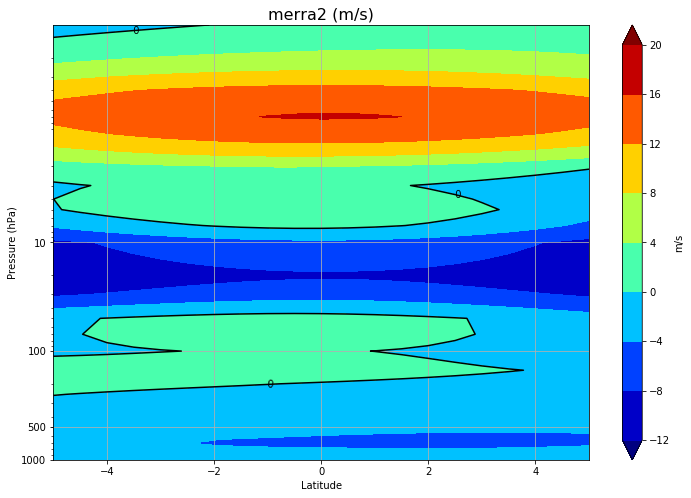

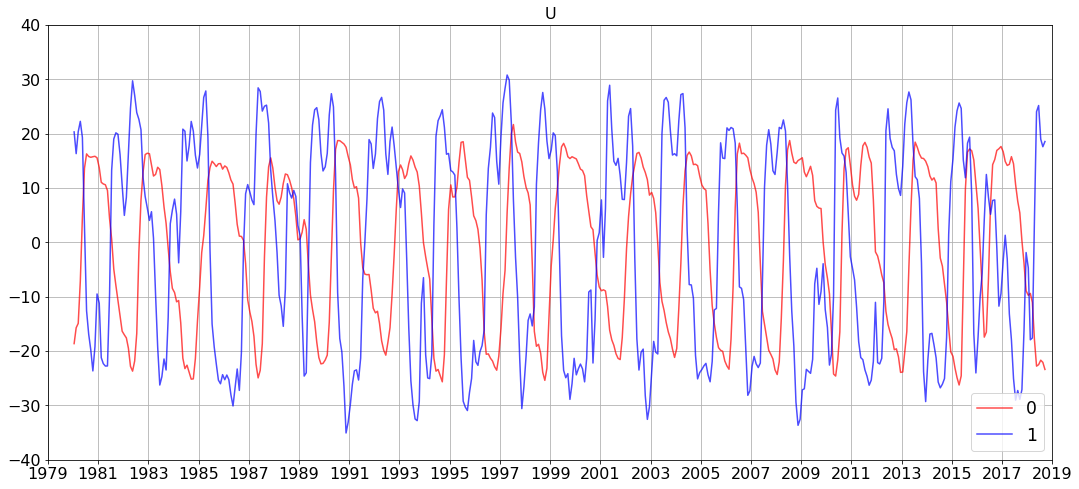

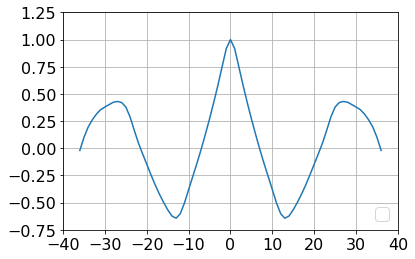

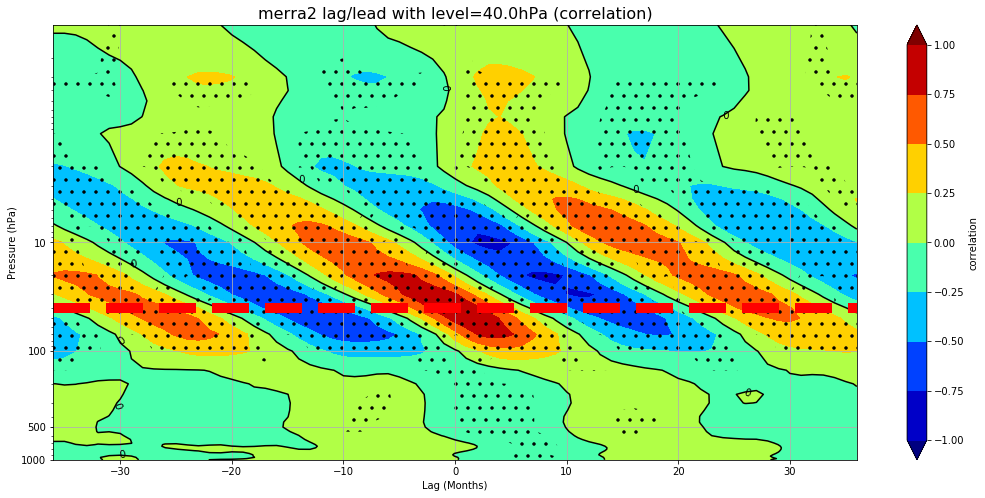

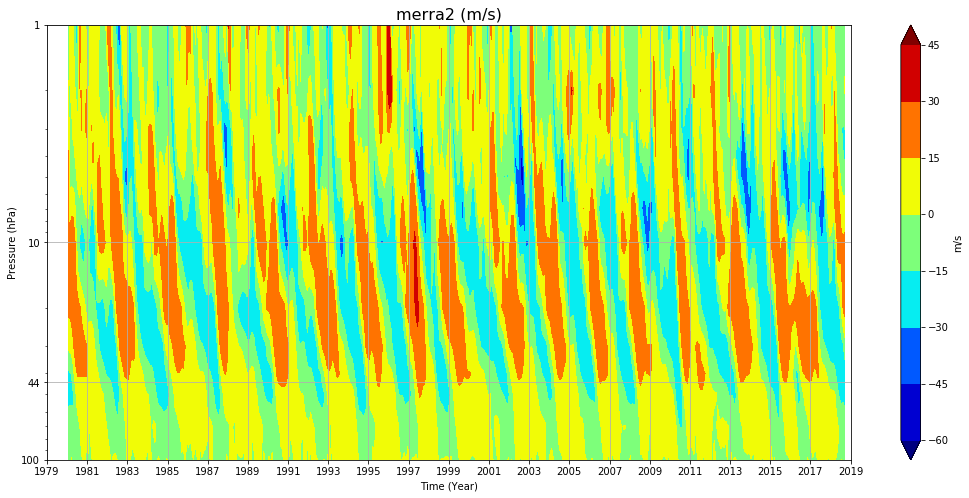

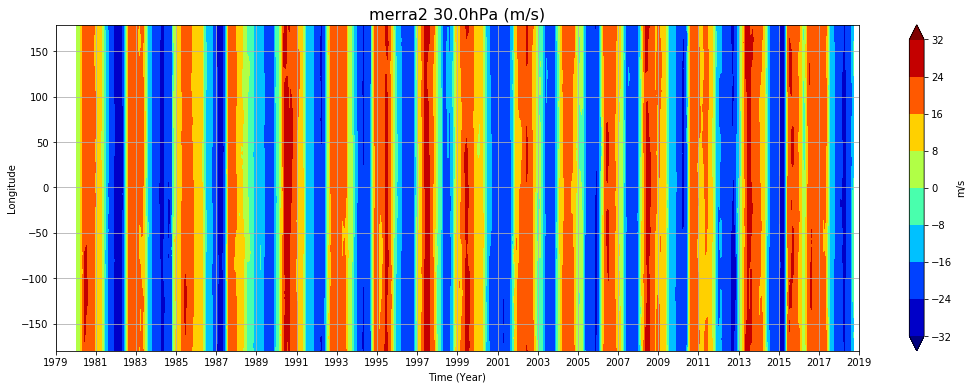

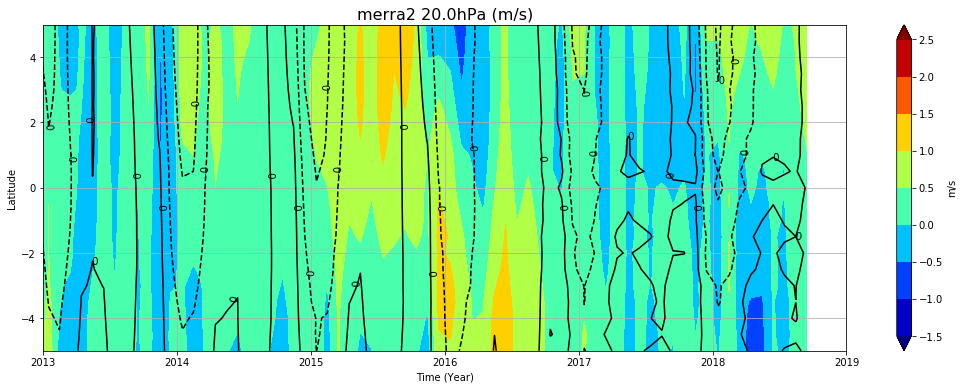

END


In [5]:
print('BEGIN')

# merra2_lev = merra2_ifhN.variables['lev'][:]

# print(merra2_lat[170:190+1])

# print(merra2_lev)

xysize=(12,8)

shade_2d_simple(np.average(np.average(merra2_llbox_monthly_climatology_from_monthly_U,axis=0),axis=-1), \
  title='merra2', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(merra2_monthly_files.lat[merra2_llbox_indices.jmin[0]:merra2_llbox_indices.jmax[0]+1], \
          merra2_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  ylim=[0.1,1000], \
  grid=True, \
  clevs=None, \
  n_contour=[0])

xysize=(18,8)

ybeg,yend=2013,2019
ybeg,yend=1979,2019
  
plot_array_U=np.average(np.average( \
  merra2_llbox_monthly_anomaly_from_monthly_U[:,:,:,:],axis=-1), \
  axis=-1, weights=merra2_monthly_files.clat[merra2_llbox_indices.jmin[0]:merra2_llbox_indices.jmax[0]+1])

plot_array_U_clim=np.average(np.average( \
  merra2_llbox_monthly_climatology_from_monthly_U[:,:,:,:],axis=-1), \
  axis=-1, weights=merra2_monthly_files.clat[merra2_llbox_indices.jmin[0]:merra2_llbox_indices.jmax[0]+1])

#print('plot_array_U_clim=',plot_array_U_clim)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

plot_array_OMEGA=np.average(np.average( \
  merra2_llbox_monthly_anomaly_from_monthly_OMEGA[:,:,:,:],axis=-1), \
  axis=-1, weights=merra2_monthly_files.clat[merra2_llbox_indices.jmin[0]:merra2_llbox_indices.jmax[0]+1])

plot_array_O3=np.average(np.average( \
  merra2_llbox_monthly_anomaly_from_monthly_O3[:,:,:,:],axis=-1), \
  axis=-1, weights=merra2_monthly_files.clat[merra2_llbox_indices.jmin[0]:merra2_llbox_indices.jmax[0]+1])

levs=(merra2_monthly_files.lev*100).astype(int).tolist()

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

lev_to_plot1=levs.index(4000)
lev_to_plot2=levs.index(1000)

ybeg,yend=1979,2019

plot_xy(Diag=False, \
        input_data=(plot_array_U[:,lev_to_plot1],plot_array_U[:,lev_to_plot2]), \
        input_xvals=(merra2_monthly_files.year_fraction_anomaly,merra2_monthly_files.year_fraction_anomaly), \
        grid=True, \
        title='U', \
        units='m/s', \
        xysize=xysize, \
        xticks=range(ybeg,yend+1,2), \
        xlim=[ybeg,yend], \
        line_colors=['red','blue'], \
       )

#https://www.scipy-lectures.org/intro/scipy/auto_examples/plot_spectrogram.html
#freqs, times, spectrogram = signal.spectrogram(plot_array_U[:,lev_to_plot1])

# freqs, psd = signal.welch(plot_array_U[:,lev_to_plot2])

# plt.figure(figsize=(5, 4))
# plt.semilogx(freqs, psd)
# plt.title('PSD: power spectral density')
# plt.xlabel('Frequency')
# plt.ylabel('Power')
# plt.tight_layout()
# plt.show()

# #print(freqs,psd)

# print(psd.argmin(), freqs[psd.argmin()], psd[psd.argmin()])

# raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

lag=[-1,0,1]
lag_min,lag_max=-36,36
lag=range(lag_min,lag_max+1)

ll=lagcorr(plot_array_U[:,lev_to_plot2], plot_array_U[:,lev_to_plot2], lag=lag, verbose=False)

#print('ll=',ll)

plot_xy(Diag=False, input_data=(ll[:,0],), input_xvals=(lag,), grid=True)

lag_array_U1=ma.zeros((len(list(lag)),len(levs)),dtype=float)
lag_array_U2=ma.zeros((len(list(lag)),len(levs)),dtype=float)
pp_array_U1=ma.zeros((len(list(lag)),len(levs)),dtype=float)
pp_array_U2=ma.zeros((len(list(lag)),len(levs)),dtype=float)

lev_value_to_plot=10000
lev_value_to_plot=2000

#     <x>,<y>: 1-D time series.
#     Note: when talking about lead/lag, uses <y> as a reference.
#     Therefore positive lag means <x> lags <y> by <lag>, computation is
#     done by shifting <x> to the left hand side by <lag> with respect to
#     <y>.

for lev_value_to_plot in [4000]:
#for lev_value_to_plot in levs:
  for cnt,lev in enumerate(levs):
    #print(cnt,lev)
    lag_array_U1[:,cnt] = lagcorr(plot_array_U[:,levs.index(lev_value_to_plot)], plot_array_U[:,cnt], lag=lag, verbose=False)[:,0]
    pp_array_U1[:,cnt] = lagcorr(plot_array_U[:,levs.index(lev_value_to_plot)], plot_array_U[:,cnt], lag=lag, verbose=False)[:,1]
    lag_array_U2[:,cnt] = lagcorr(plot_array_U[:,cnt], plot_array_U[:,levs.index(lev_value_to_plot)], lag=lag, verbose=False)[:,0]
    pp_array_U2[:,cnt] = lagcorr(plot_array_U[:,cnt], plot_array_U[:,levs.index(lev_value_to_plot)], lag=lag, verbose=False)[:,1]

  shade_2d_simple(np.transpose(lag_array_U2), \
    title='merra2 lag/lead with level='+str(lev_value_to_plot/100)+'hPa', \
    units='correlation', \
    reverse_yaxis=True, \
    yscale='log', \
    xyvals=(np.array(lag), merra2_monthly_files.lev), \
    xysize=xysize, \
    xlab='Lag (Months)', \
    ylab='Pressure (hPa)', \
    ytik=[10,100,500,1000], \
    ylim=[0.1,1000], \
    grid=True, \
    clevs=None, \
    n_contour=[0], \
    hatching=(np.transpose(pp_array_U2), np.array(lag), merra2_monthly_files.lev, 0., 0.01), \
    polygons=([lag_min,lag_max,lev_value_to_plot/100, \
               lev_value_to_plot/100, \
              'red', \
              '--', \
              10],) \
    )

#   shade_2d_simple(np.transpose(pp_array_U), \
#     title='merra2 lag/lead with level='+str(lev_value_to_plot/100)+'hPa', \
#     units='correlation', \
#     reverse_yaxis=True, \
#     yscale='log', \
#     xyvals=(np.array(lag), merra2_monthly_files.lev), \
#     xysize=xysize, \
#     xlab='Lag (Months)', \
#     ylab='Pressure (hPa)', \
#     ytik=[10,100,500,1000], \
#     ylim=[0.1,1000], \
#     grid=True, \
#     clevs=None, \
#     n_contour=[0], \
#     polygons=([lag_min,lag_max,lev_value_to_plot/100, \
#                lev_value_to_plot/100, \
#               'red', \
#               '--', \
#               10],) \
#     )


#print('lag_array.shape=',lag_array.shape)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

# plot_xy(Diag=False, input_data=input_datas, input_xvals=input_xvals, \
#   title='SODA', \
#   units='m3 * 1e14', \
#   xlab='Year', \
#   ylab='WWV', \
#   zero2=False, \
#   reverse_xaxis=False, \
#   reverse_yaxis=False, \
#   xysize=(16,8), \
#   line_colors=['red','blue','green'], \
#   line_labels=soda_wwvbox_indices.boxes_labs[0:3], grid=True \
#   )

shade_2d_simple(np.transpose(plot_array_U), \
  title='merra2', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(merra2_monthly_files.year_fraction_anomaly, merra2_monthly_files.lev), \
  xysize=xysize, \
  xlab='Time (Year)', \
  ylab='Pressure (hPa)', \
#   ytik=[0.1, 1, 10, 100, 500, 1000], \
  ytik=[1, 10, 44, 100], \
#   ylim=[0.1, 1000], \
  ylim=[10, 100], \
  xtik=range(ybeg,yend+1,2), \
  xlim=[ybeg,yend], \
  grid=True, \
  clevs=None) #, \
#   contour_arrays=((merra2_monthly_files.year_fraction_anomaly, \
#     merra2_monthly_files.lev, \
#     np.transpose(plot_overlay),),))

#   n_contour=[-12,12], \
  
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

levs=(merra2_monthly_files.lev*100).astype(int).tolist()

#print(levs)

lev_to_plot=levs.index(2000) #20hPa
lev_to_plot=levs.index(3000) #30hPa

xysize=(18,6)

clevs=None

shade_2d_simple(np.transpose(np.average(merra2_llbox_monthly_anomaly_from_monthly_U[:,lev_to_plot,:,:],axis=-2)), \
  title='merra2 '+str(levs[lev_to_plot]/100.)+'hPa', \
  units='m/s', \
  xysize=xysize, \
  xlab='Time (Year)', \
  ylab='Longitude', \
  xyvals=(merra2_monthly_files.year_fraction_anomaly, \
  merra2_monthly_files.lon), \
  xtik=range(1979,2019+1,2), \
  xlim=[1979,2019], \
  clevs=clevs, \
  grid=True)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#step=10;clevs=sorted(list(set(np.arange(-50, 50+step, step).tolist())))

levs=[10, 30, 40, 50, 69, 100, 200, 300, 400, 500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 1000, 15000, 20000, 25000, 30000, 35000, 40000]
levs=[2000]
for lev in levs:
  lev_to_plot=levs.index(lev)

  #plot_overlay=np.average(merra2_llbox_monthly_anomaly_from_monthly_OMEGA[:,lev_to_plot,:,:],axis=-1)
  plot_overlay=np.average(merra2_llbox_monthly_anomaly_from_monthly_O3[:,lev_to_plot,:,:],axis=-1)
  
  ybeg,yend=2013,2019
  #ybeg,yend=1979,2019
  
  shade_2d_simple(np.transpose(np.average(merra2_llbox_monthly_anomaly_from_monthly_U[:,lev_to_plot,:,:],axis=-1)), \
    title='merra2 '+str(levs[lev_to_plot]/100.)+'hPa', \
    units='m/s', \
    xysize=xysize, \
    xlab='Time (Year)', \
    ylab='Latitude', \
    xyvals=(merra2_monthly_files.year_fraction_anomaly, \
    merra2_monthly_files.lat[merra2_llbox_indices.jmin[0]:merra2_llbox_indices.jmax[0]+1]), \
    xtik=range(ybeg,yend+1,1), \
    xlim=[ybeg,yend], \
    clevs=clevs, \
    contour_arrays=((merra2_monthly_files.year_fraction_anomaly, \
                     merra2_monthly_files.lat[merra2_llbox_indices.jmin[0]:merra2_llbox_indices.jmax[0]+1], \
                    np.transpose(plot_overlay),),), \
    grid=True)
    
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

print('END')

In [ ]:
print('BEGIN')

'''
Run this to produce data.nc, then run merra-2.ncl to produce newdata.nc, to be plotted next.
'''

Clobber=True
output_file='data.nc'

nc_model='NETCDF4_CLASSIC'

shape=plot_array_U.shape

print(shape)

if(Clobber and os.path.exists(output_file)):
  os.remove(output_file)

ofh = netCDF4.Dataset(output_file, 'w', format=nc_model)

timeD = ofh.createDimension('time', shape[0])
levD = ofh.createDimension('lev', shape[1])

timeV = ofh.createVariable('time', 'f8', dimensions=('time'))
levV = ofh.createVariable('lev', 'f4', dimensions=('lev'))
varV =ofh.createVariable('data', 'f4', dimensions=('time','lev'), fill_value=1e20)

timeV[:] = merra2_monthly_files.year_fraction_anomaly
levV[:] = ma.filled(merra2_monthly_files.lev)
varV[:] = plot_array_U

varV.setncattr('missing_value',1e20)

ofh.close()

print('END')

In [ ]:
print('BEGIN')

xysize=(18,6)

input_file='newdata.nc'
ifh = netCDF4.Dataset(input_file, 'r')

newdata = ifh.variables['newdata'][:]
frq = ifh.variables['frq'][:]
lev_local = ifh.variables['lev'][:]

print(newdata.shape)
shade_2d_simple(np.transpose(np.log(newdata[:,:,0])-np.log(newdata[:,:,3])), \
  title='variance', \
  units='units', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(frq, lev_local), \
  xysize=xysize, \
  xlab='Frequency (cycles/month)', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  ylim=[0.1,1000], \
  xtik=[0,.1,.2,.3,.4,.5], \
  xlim=[0,0.5], \
  grid=True, \
  clevs=None, \
  n_contour=[0], \
#   hatching=(np.transpose(np.log(newdata[:,:,3])), frq, lev_local, 0., 0.01), \
  )

shade_2d_simple(np.transpose(np.log(newdata[:,:,0])), \
  title='Power Density', \
  units='$log( ms^{-1^{2}} / cyles\;month^{-1} )$', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(frq, lev_local), \
  xysize=xysize, \
  xlab='Frequency (cycles/month)', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  ylim=[0.1,1000], \
  xtik=list(np.arange(0,0.5,.02)), \
  xlim=[0,0.5], \
  grid=True, \
  clevs=None, \
  n_contour=[0], \
  hatching=(np.transpose(np.log(newdata[:,:,0])-np.log(newdata[:,:,1])), frq, lev_local, 0.001, 100), \
  )
  
#1/(frq_nino_hadisst*12),
clevs=None
step=1;clevs=sorted(list(set(np.arange(-2, 9+step, step).tolist())))

shade_2d_simple(np.transpose(np.log(newdata[:,:,0])), \
  title='Power Density', \
  units='$log( ms^{-1^{2}} / cyles\;month^{-1} )$', \
  reverse_yaxis=True, \
  reverse_xaxis=True, \
  yscale='log', \
  xyvals=(1/(frq*12), lev_local), \
  xysize=xysize, \
  xlab='Period (years)', \
  ylab='Pressure (hPa)', \
  ytik=[1,10,100,500,1000], \
  ylim=[0.1,1000], \
#  xtik=list(np.arange(0,0.5,.02)), \
  xlim=[0,10], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  hatching=(np.transpose(np.log(newdata[:,:,0])-np.log(newdata[:,:,1])), 1/(frq*12), lev_local, 0.001, 100), \
  )


print('END')

In [ ]:
# def year_fraction(ybeg, yend, **kwargs):
#   import inspect
#   import numpy as np
#   #mbeg=mend=None
#   mbeg,mend=1,12 #defaults
#   for key, value in kwargs.items():
#     if(key=='mbeg'):
#       mbeg=int(value)
#     elif(key=='mend'):
#       mend=int(value)
#     else:
#       raise SystemExit('Dont know that key.'+__file__+' line number: '+str(inspect.stack()[0][2]))
#   #months=[1,2,3,4,5,6,7,8,9,10,11,12]

#   dim=np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
#   day_end=np.cumsum(dim)
#   day_beg=day_end-dim+1.0
#   day_mid = (day_beg+day_end)/2.0
#   day_frac = day_mid/np.sum(dim)
#   yvals = range(ybeg,yend+1)
#   yfracs = np.zeros((len(yvals)*12),dtype=float)
#   for yval in yvals:
#     sss=(yval-yvals[0])*12
#     eee=sss+12
#     yfracs[sss:eee] = yval+day_frac
#     #print(sss,eee)

#   #print('day_mid=',day_mid)
#   #print(months)
#   #print('day_end=',day_end)
#   #print('day_beg=',day_beg)
#   #print('day_frac=',day_frac)
#   #print('ybeg,yend=',ybeg,yend)
#   #print('yvals=',yvals)
#   #print(len(yvals))
#   #print(yfracs)
#   #return(yfracs[mbeg-1:-1])

#   tbeg=mbeg-1
#   tend=len(yfracs)-(12-mend)
#   return(yfracs[tbeg:tend]) #end of year_fraction



In [ ]:
# def plot_bar(data, xticks, **kwargs):
#   """
#   """
#   import matplotlib
#   import matplotlib.pyplot as plt
#   import numpy as np
#   import inspect

#   Diag=legend=False
#   bar_width=xysize=title=xlab=ylab=None

#   xsize,ysize=15,5
#   for key, value in kwargs.items():
#     if(key=='Diag'):
#       Diag=bool(value)
#     elif(key=='legend'):
#       legend=value
#     elif(key=='bar_width'):
#       bar_width=value
#     elif(key=='xysize'):
#       if(Diag): print('Inputing xsize,ysize.')
#       xsize,ysize=value
#     elif(key=='title'):
#       title=value
#     elif(key=='xlab'):
#       xlab=value
#     elif(key=='ylab'):
#       ylab=value
#     else:
#       raise SystemExit('Dont know that key.'+__file__+' line number: '+str(inspect.stack()[0][2]))

#   fig, ax = plt.subplots()

#   fig.set_size_inches(xsize, ysize)

#   index = np.arange(len(xticks))

#   #print('len(data)=',len(data))
  
#   #print('index=',index)
  
#   rects = ()
#   for d in range(len(data)):
#     #print('d=',d)
#     #print(data[d])
    
#     rects = rects + plt.bar(index+d*bar_width, data[d][0], bar_width, alpha=data[d][2], color=data[d][1], label=data[d][3])
    
#   if(type(xlab)!=type(None)):
#     plt.xlabel(xlab[0], fontsize=xlab[1])

#   if(type(ylab)!=type(None)):
#     plt.ylabel(ylab[0], fontsize=ylab[1])

#   if(type(title)!=type(None)):
#     plt.title(title[0], fontsize=title[1])

#   plt.xticks(index + bar_width*.5*(len(data)-1), (xticks))

#   if(type(legend)!=type(None) and bool(legend[0])):
#     plt.legend(fontsize=legend[1], loc=legend[2])

#   plt.tight_layout()
#   plt.show()

#   #print(rects)
#   return #plot_bar

plot_bar_data=([np.array(cnt_months_west_to_east) / np.sum(np.array(cnt_months_west_to_east)), 'b', 0.8, 'West to East'],)
plot_bar_data = plot_bar_data + ([np.array(cnt_months_east_to_west) / np.sum(np.array(cnt_months_east_to_west)), 'g', 0.8, 'East to West'],)
#plot_bar_data = plot_bar_data + ([np.array(cnt_months_east_to_west) / np.sum(np.array(cnt_months_east_to_west)), 'r', 0.8, 'Dummy'],)

xticks=['J','F','M','A','M','J','J','A','S','O','N','D']
plot_bar(Diag=False, \
          data=plot_bar_data, \
          xticks=xticks, \
          title=['MERRA2 1980-2018',16], \
          xlab=['Month of phase change',16], \
          ylab=['Relative occurence',16], \
          bar_width=0.30, \
          legend=[True,20,'best'] \
        )

print('END')

In [32]:


# def shade_2d_latlon(data,**kwargs):
#   """
#   """
#   import inspect
#   import numpy as np
#   Diag = add_contours = cmap_check = title_check = units_check = extend_check = \
#     xyvals_check = clevs_check = False
#   n_contour = hatching = vector_arrays = output = None
#   xsize,ysize=6.0,4.0
#   title_fontsize=16.0

#   for key, value in kwargs.items():
#     if(key=='Diag'):
#       Diag=bool(value)
#     elif(key=='xysize'):
#       xsize,ysize=value
#     elif(key=='cmap'):
#       cmap=value
#       cmap_check=True
#     elif(key=='title'):
#       title=value
#       title_check=True
#     elif(key=='units'):
#       units=value
#       units_check=True
#     elif(key=='add_contours'):
#       add_contours=bool(value)
#     elif(key=='extend'):
#       extend=value
#     elif(key=='clevs'):
#       clevs=value
#       clevs_check=True
#     elif(key=='xyvals'):
#       xvals,yvals=value
#       xyvals_check=True
#     elif(key=='title_fontsize'):
#       title_fontsize=value
#     elif(key=='n_contour'):
#       n_contour=value
#     elif(key=='hatching'):
#       hatching=value
#       hatch_data,hatch_styles,hatch_levs=hatching
#     elif(key=='vector_arrays'):
#       vector_arrays=value
#     elif(key=='output'):
#       output=value
#       if(Diag): print('Generating output file.')
    
# #       (above_Mean, [None,'.'], [0,50,100])

#       if(Diag): print('shade_2d_latlon: hatching on')
#     else:
#       raise SystemExit('Dont know that key.'+__file__+' line number: '+str(inspect.stack()[0][2]))

#   #print('len(clevs)=',len(clevs))
#   #if(len(clevs)==0): del(clevs)

#   if(not cmap_check): cmap='jet'
#   if(not title_check): title='data'
#   if(not units_check): units='units'
#   if(not extend_check): extend='both'

#   import cartopy.crs as ccrs
#   from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
#   from cartopy.util import add_cyclic_point
#   import matplotlib as mpl
#   mpl.rcParams['mathtext.default'] = 'regular'
#   import matplotlib.pyplot as plt

#   fig = plt.gcf()
#   fig.set_size_inches(xsize, ysize) #default 6.0,4.0

#   ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
#   #clevs = [0,50,100,150,200,250,300,10000]
#   #clevs = [0,50,100,150,200,250,300]

#   #print('extend=',extend)

#   if(not clevs_check or type(clevs)==type(None)):
#     fill = ax.contourf(xvals, yvals, data, cmap=cmap, transform=ccrs.PlateCarree(), extend=extend)
#   else:
#     fill = ax.contourf(xvals, yvals, data, clevs, cmap=cmap, transform=ccrs.PlateCarree(), extend=extend)
#   if(add_contours): plt.contour(data,colors='black')

#   if(type(n_contour)!=type(None)):
#     nc = ax.contour(xvals, yvals, data, transform=ccrs.PlateCarree(), levels=n_contour, colors='black')
#     plt.clabel(nc, inline=False, fontsize=10, fmt='%3.0f') #, manual=manual_locations)
    
# #     (above_Mean, [None,'.'], [0,50,100])
# #   print('hatch_levs=',hatch_levs)
# #   print('hatch_styles=',hatch_styles)
# #   print('hatch_data=',hatch_data)
  
#   #print(type(hatching))
#   if(type(hatching)!=type(None)):
#   #hatch_data,hatch_styles,hatch_levs=hatching
#     #print('hello')
#     stip = ax.contourf(xvals, yvals, hatch_data, levels=hatch_levs, hatches=hatch_styles, transform=ccrs.PlateCarree(), colors='none')

#   vectors = []
#   if(type(vector_arrays)!=type(None)):
#     for cnt in range(len(vector_arrays)):
#       anotherX, anotherY, anotherdataU, anotherdataV, anotherpivot, anotherscale, anotherwidth = vector_arrays[cnt]
#       #print('anotherdataU=',anotherdataU)
#       #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
#       vectors = ax.quiver(anotherX, anotherY, anotherdataU, anotherdataV, \
#                           transform=ccrs.PlateCarree(), \
#                           pivot=anotherpivot, \
#                           scale=anotherscale, \
#                           width=anotherwidth) #, width=0.022)
# #                           transform=ccrs.PlateCarree(), pivot='mid', scale=500) #, width=0.022)
      
#   ax.coastlines()
#   ax.gridlines()
#   ax.set_xticks([0, 60, 120, 180, 240, 300, 359.99], crs=ccrs.PlateCarree())
#   ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#   lon_formatter = LongitudeFormatter(zero_direction_label=True, number_format='.0f')
#   lat_formatter = LatitudeFormatter()
#   ax.xaxis.set_major_formatter(lon_formatter)
#   ax.yaxis.set_major_formatter(lat_formatter)

#   plt.colorbar(fill, orientation='horizontal')

#   if(type(units)==type(None)):
#     plt.title(title, fontsize=title_fontsize)
#   else:
#     plt.title(title+' ('+units+')', fontsize=title_fontsize)
#   #plt.savefig('test.png')

#   if(type(output)!=type(None)):
#     prefix,suffix=output
#     plt.savefig(prefix+'.'+suffix)
#     print('Image saved to ',prefix+'.'+suffix)
# #   else:
#   plt.show()
  
# #   if('output' in locals()):
# #     plt.savefig(output+'.png')
# #     print('Image saved to ',output+'.png')
# #   else:
# #     plt.show()

#   return() #end shade_2d_latlon



# print('END')

END


In [ ]:
#try to get waf working

#https://www.python-course.eu/python3_time_and_date.php
#https://cbrownley.wordpress.com/2018/05/15/visualizing-global-land-temperatures-in-python-with-scrapy-xarray-and-cartopy/
  
dpm = {'noleap': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '365_day': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'standard': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'gregorian': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'proleptic_gregorian': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'all_leap': [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '366_day': [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '360_day': [0, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]}

# def leap_year(year, calendar='standard'):
#     """Determine if year is a leap year"""
#     leap = False
#     if ((calendar in ['standard', 'gregorian',
#         'proleptic_gregorian', 'julian']) and
#         (year % 4 == 0)):
#         leap = True
#         if ((calendar == 'proleptic_gregorian') and
#             (year % 100 == 0) and
#             (year % 400 != 0)):
#             leap = False
#         elif ((calendar in ['standard', 'gregorian']) and
#                  (year % 100 == 0) and (year % 400 != 0) and
#                  (year < 1583)):
#             leap = False
#     return leap

# def get_dpm(time, calendar='standard'):
#     """
#     return a array of days per month corresponding to the months provided in `months`
#     """
#     month_length = np.zeros(len(time), dtype=np.int)

#     cal_days = dpm[calendar]

#     for i, (month, year) in enumerate(zip(time.month, time.year)):
#         month_length[i] = cal_days[month]
#         if leap_year(year, calendar=calendar):
#             month_length[i] += 1
#     return month_length
  
print("numpy version  : ", np.__version__)
print("pandas version : ", pd.__version__)
print("xarray version : ", xr.__version__)

u = xr.DataArray(np.random.normal(size=(6,4,2,24)), \
  coords=[('lat', np.arange(-75,76,30)), ('lon', np.arange(45,316,90)), \
  ('level', [100,500]), 
  ('time', ts_avg)])
#   ('time', pd.date_range('2000-01-01',periods=24,freq='M'))])
v = xr.DataArray(np.random.normal(size=(6,4,2,24)), \
  coords=[('lat', np.arange(-75,76,30)), ('lon', np.arange(45,316,90)), \
  ('level', [100,500]), \
  ('time', ts_avg)])
#   ('time', pd.date_range('2000-01-01',periods=24,freq='M'))])
print('u=',u)
u_clim = u.groupby('time.month').mean(dim='time')
v_clim = v.groupby('time.month').mean(dim='time')
print('u=',u)
print('u_clim.shape=',u_clim.shape)
print('u_clim=',u_clim)

u_anom = utils.anomalize(u, u_clim)
v_anom = utils.anomalize(v, v_clim)
psi_anom = diagnostic.stream_function(u_anom, v_anom)
out = diagnostic.wave_activity_flux(psi_anom, u, v)

calendar='proleptic_gregorian'
time_units='days since 1980-01-01 00:00'
ts_beg,ts_end=[],[]
dt_beg,dt_end=[],[]
for ynow in range(1980,1981+1):
  if(not leap_year(ynow,calendar) or calendar=='noleap'):
    days_in_month=dpm[calendar][1:]
  else:
    days_in_month=dpm[calendar][1:]
  for mnow in range(1,12+1):
    #print('ynow,mnow=',ynow,mnow)
    ts_beg.append(datetime.datetime(ynow, mnow, 1) + datetime.timedelta(hours=0.0))
    ts_end.append(datetime.datetime(ynow, mnow, days_in_month[mnow-1]) + datetime.timedelta(hours=24.0))
    dt_beg.append(netCDF4.date2num(ts_beg[-1], time_units, calendar))
    dt_end.append(netCDF4.date2num(ts_end[-1], time_units, calendar))
    #print(type(netCDF4.date2num(ts_end[-1], time_units, calendar)))
    #print(type(datetime.datetime(ynow, mnow, days_in_month[mnow-1]) + datetime.timedelta(hours=24.0)))
dt_avg = (np.array(dt_beg)+np.array(dt_end))/2.0
ts_avg = netCDF4.num2date(dt_avg, time_units, calendar)

print(ts_avg)


dataxr_U = xr.DataArray(merra2_from_monthly_U[0:24,], \
  coords=[('time', ts_avg), \
          ('level', merra2_monthly_files.lev), \
          ('lat', merra2_monthly_files.lat), \
          ('lon', merra2_monthly_files.lon)])

dataxr_V = xr.DataArray(merra2_from_monthly_V[0:24,], \
  coords=[('time', ts_avg), \
          ('level', merra2_monthly_files.lev), \
          ('lat', merra2_monthly_files.lat), \
          ('lon', merra2_monthly_files.lon)])

dataxr_U_clim = dataxr_U.groupby('time.month').mean(dim='time')
dataxr_V_clim = dataxr_V.groupby('time.month').mean(dim='time')

clevs=None

xysize=(6,4)

shade_2d_latlon( \
  dataxr_V_clim[0,25,:,:], \
  xyvals=(merra2_monthly_files.lon, merra2_monthly_files.lat), \
  title='try1', \
  units='try2', \
  clevs=clevs \
  )

levs_selection=[16, 22, 24, 27]

dataxr_U_anom = utils.anomalize(dataxr_U[:,levs_selection,:,:], dataxr_U_clim[:,levs_selection,:,:])
dataxr_V_anom = utils.anomalize(dataxr_V[:,levs_selection,:,:], dataxr_V_clim[:,levs_selection,:,:])
#time: 24, level: 4, lat: 361, lon: 576
 
dataxr_PSI_anom = diagnostic.stream_function(dataxr_U_anom, dataxr_V_anom)
#time: 24, level: 4, lat: 361, lon: 576
        
dataxr_WAV = diagnostic.wave_activity_flux(dataxr_PSI_anom, dataxr_U[:,levs_selection,:,:], dataxr_V[:,levs_selection,:,:])
#lat: 361, level: 4, lon: 576, time: 24)

#dataxr_WAV.v_waf
#level: 4, time: 24, lat: 361, lon: 576)
        
level_choice=0
time_choice=0

skip_sp=25
skip_np=25

shade_2d_latlon( \
  dataxr_WAV.v_waf[level_choice,time_choice,:,:], \
  xyvals=(merra2_monthly_files.lon, merra2_monthly_files.lat), \
  title='try1', \
  units='try2', \
  clevs=clevs \
  )

#print(dataxr_WAV.u_waf)

step=8;clevs=sorted(list(set(np.arange(8, 56+step, step).tolist())))

plotD = np.hypot(dataxr_WAV.u_waf, dataxr_WAV.v_waf)

plotDx = np.where(plotD > 8, plotD, np.nan)
#(4, 24, 361, 576)

merra2_lats = merra2_monthly_files.lat
merra2_lons = merra2_monthly_files.lon

new_merra2_lons=merra2_monthly_files.lon
new_merra2_lons=np.where(new_merra2_lons<0, new_merra2_lons+360, new_merra2_lons)
new_merra2_lons=np.roll(new_merra2_lons, 287)

#print('new_lons=',new_lons)

new_uuu = np.roll(dataxr_WAV.u_waf[:,:,:,:], 287, axis=3)
new_vvv = np.roll(dataxr_WAV.v_waf[:,:,:,:], 287, axis=3)

new_uuux = np.where(plotD[:,:,:,:]>1, new_uuu, np.nan)
new_vvvx = np.where(plotD[:,:,:,:]>1, new_vvv, np.nan)

#print('new_uuu=',new_uuu)

skip=10

xysize=(12,8)

#was good, original: won't work for skip_sp,np=0 will need to setup if statements and data sets depending on values of these.
shade_2d_latlon( \
  plotDx[level_choice, time_choice, skip_sp:-skip_np, :], \
  xysize=xysize, \
  xyvals=(merra2_lons, merra2_lats[skip_sp:-skip_np]), \
  title='try1', \
  units='try2', \
  clevs=clevs, \
  vector_arrays=((new_merra2_lons[::skip], \
                  merra2_lats[skip_sp:-skip_np][::skip], \
                  new_uuux[level_choice, time_choice, skip_sp:-skip_np:skip, ::skip], \
                  new_vvvx[level_choice, time_choice, skip_sp:-skip_np:skip, ::skip],\
                  'tail', \
                  600, \
                  None),), \
  )

print('END')

BEGIN


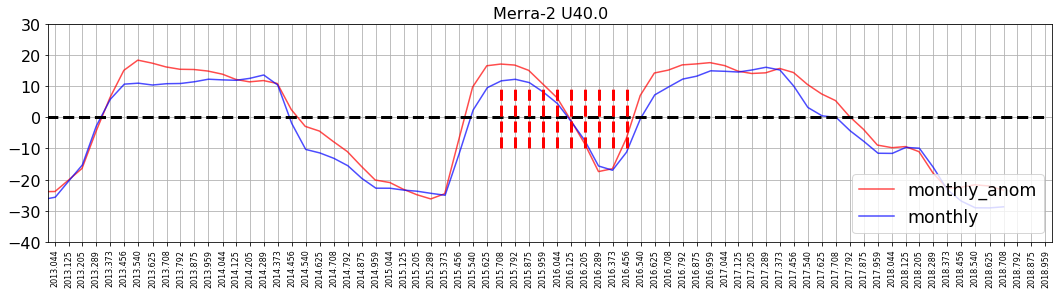

data_sign= [-1.0 -1.0 -1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 -1.0 -1.0 -1.0 -1.0
 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 -1.0
 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 -1.0 1.0 1.0 1.0
 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
 -1.0 -1.0 -1.0 -1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

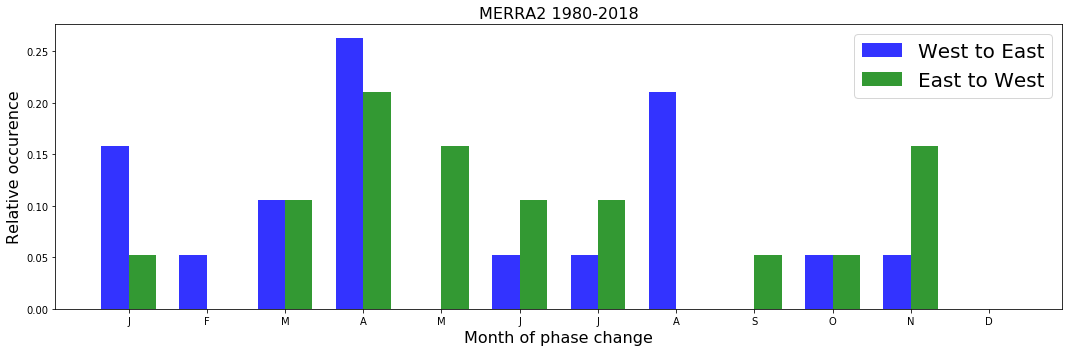

west_to_east_dates= [[4, 16], [32, 42], [62, 77], [92, 106], [109, 111], [124, 136], [154, 166], [179, 194], [207, 218], [229, 245], [265, 279], [291, 303], [316, 327], [340, 354], [356, 357], [368, 382], [400, 412], [426, 432], [439, 452]]
east_to_west_dates= [[17, 31], [43, 61], [78, 91], [107, 108], [112, 123], [137, 153], [167, 178], [195, 206], [219, 228], [246, 264], [280, 290], [304, 315], [328, 339], [355, 355], [358, 367], [383, 399], [413, 425], [433, 438]]
4 16
heights_hPa= [[43.98769528790254], [13.348703204759566, 55.53862898999841], [17.045748401076803, 59.888845644364494], [18.22223411776374, 65.26037598209714], [18.5373700568237], [19.068337546565324], [22.333348968784513], [25.30622804350418], [26.601009123903495], [26.707998951985807, 68.41202389154964], [26.423483289807066], [27.955543934457452], [34.044300711950704]]


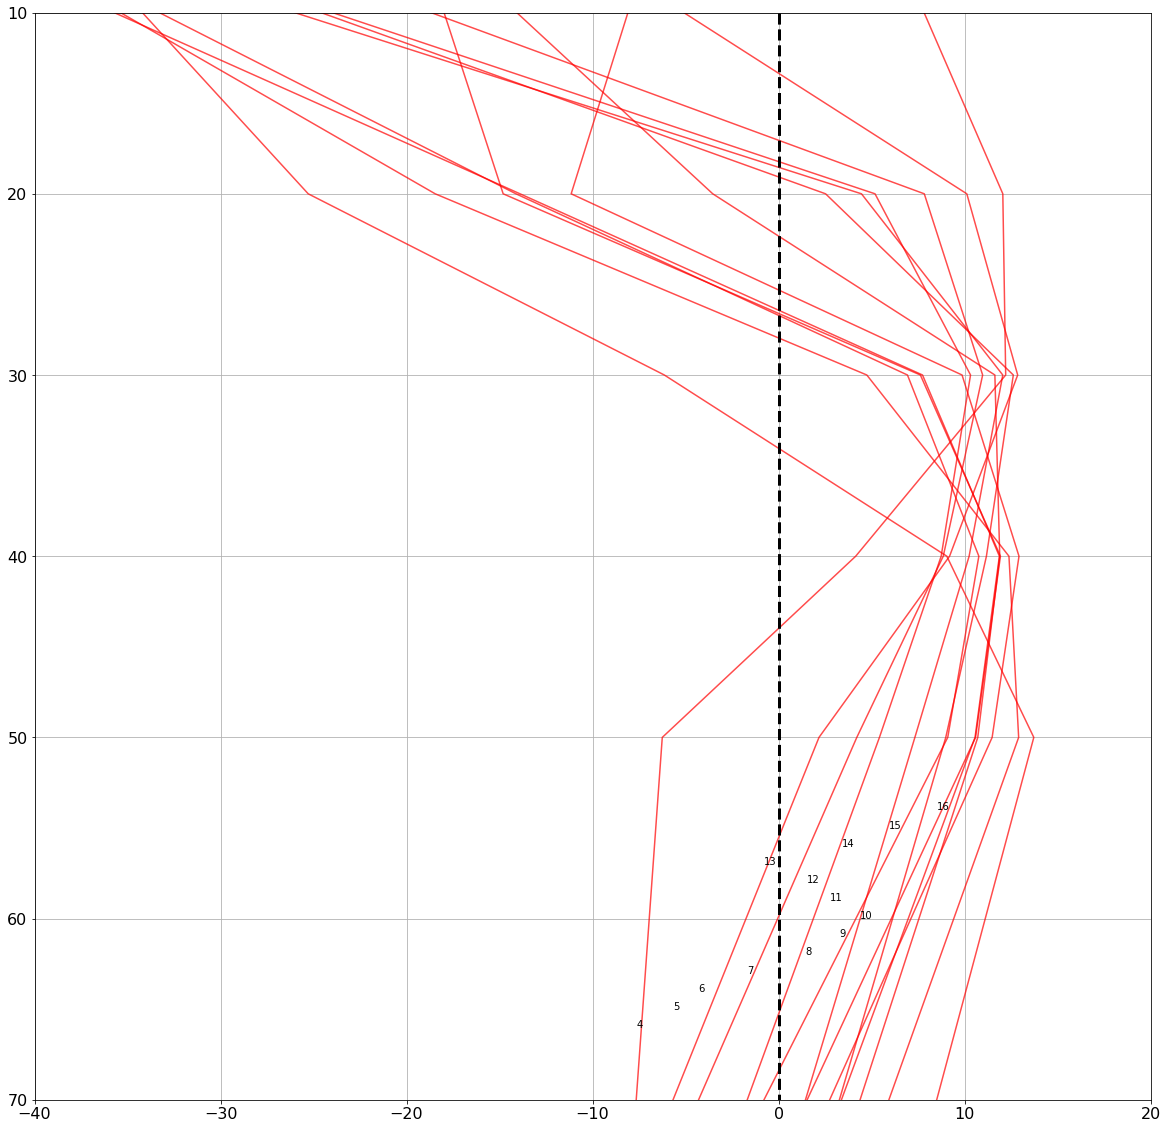

[70.0 50.0 40.0 30.0 20.0 10.0]


SystemExit: STOP!:jupyter_notebook line number: 199

/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:
print('BEGIN')

'''
Firstly plot eastward/westward phase of QBO based on zonal winds.
then...
Run this to produce data_mpsi.nc, then run merra-2_mpsi.ncl to produce new_data_mpsi.nc, to be plotted next.
'''

FreshStart=True
#FreshStart=False #turn off initialisation/creation of certain big/timely data objects to speed up.

ybeg,yend=2013,2018+1

merra2_year_fraction = year_fraction(merra2_monthly_files.date_time_stamp_tfreq[0].year, \
                                   merra2_monthly_files.date_time_stamp_tfreq[-1].year, \
                                   mbeg = merra2_monthly_files.date_time_stamp_tfreq[0].month, \
                                   mend = merra2_monthly_files.date_time_stamp_tfreq[-1].month)

levs=(merra2_monthly_files.lev*100).astype(int).tolist()

#print('levs[lev_to_plot1]=',levs[lev_to_plot1])

merra2_years_months=[]
for cnt in range(merra2_monthly_files.date_time_stamp_tfreq.size):
  merra2_years_months.append(merra2_monthly_files.date_time_stamp_tfreq[cnt].year*100+merra2_monthly_files.date_time_stamp_tfreq[cnt].month)

#print(len(merra2_years_months))

#print(merra2_from_monthly_U.shape)

dates_to_plot=((2015,9), (2015,10), (2015,11), (2015,12), (2016,1), (2016,2), (2016,3), (2016,4), (2016,5), (2016,6))

xysize=(6,4)

polygons=([merra2_monthly_files.year_fraction_anomaly[0],merra2_monthly_files.year_fraction_anomaly[-1],0,0,'black','--',3],)

for date_to_plot in dates_to_plot:
  year,month=date_to_plot
  YYYYMM='{0:04d}'.format(year)+'{0:02d}'.format(month)
  this_data=np.average(merra2_from_monthly_U[merra2_years_months.index(int(YYYYMM)), :, :, :], axis=-1)
  this_num=np.average(this_data[lev_to_plot1, merra2_llbox_indices.jmin[0]:merra2_llbox_indices.jmax[0]+1])
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  step=20;clevs=sorted(list(set(np.arange(-100, 100+step, step).tolist())))

#uncomment when need to plot:

#   shade_2d_simple(this_data, \
#     title='merra2 zonal averaged '+YYYYMM+' U '+'{:.2f}'.format(this_num), \
#     units='m/s', \
#     reverse_yaxis=True, \
#     yscale='log', \
#     xyvals=(merra2_monthly_files.lat, merra2_monthly_files.lev), \
#     xysize=xysize, \
#     xlab='Latitude', \
#     ylab='Pressure (hPa)', \
#     ytik=[1,10,100,500,1000], \
#     ylim=[0.1,1000], \
#     grid=True, \
#     clevs=clevs, \
#     n_contour=[0], \
#     polygons=([-90,90,40,40,'red','--',5],) \
#     )

  polygons = polygons + ([merra2_year_fraction[merra2_years_months.index(int(YYYYMM))],merra2_year_fraction[merra2_years_months.index(int(YYYYMM))],-10,10,'red','--',3],) #this is for adding date lines to upcoming xy plot.

#print('plot_array_U_clim.shape=',plot_array_U_clim.shape)

xysize=(18,4)

#plot_array_U_clim

#note plot_array_U is an anomaly (although check if switched off), whereas merra2_from_monthly_U is non-anomaly.

xticks=year_fraction(ybeg,yend)

#print(merra2_year_fraction)

#abc

plot_xy(Diag=False, \
        input_data=(plot_array_U[:,lev_to_plot1], \
                    np.average(np.average(merra2_from_monthly_U[:,lev_to_plot1,merra2_llbox_indices.jmin[0]:merra2_llbox_indices.jmax[0]+1,:],axis=-1), axis=-1, weights=merra2_monthly_files.clat[merra2_llbox_indices.jmin[0]:merra2_llbox_indices.jmax[0]+1])), \
        input_xvals=(merra2_monthly_files.year_fraction_anomaly, merra2_year_fraction), \
        grid=True, \
        title='Merra-2 U'+str(levs[lev_to_plot1]/100), \
        units='m/s', \
        xysize=xysize, \
        xticks=xticks, \
        xticks_fontsize=8, \
        x_lab_rotation=90, \
#         xticks=range(ybeg,yend+1,2), \
        xlim=[ybeg,yend], \
        line_colors=['red','blue'], \
        line_labels=['monthly_anom','monthly'], \
        polygons=polygons \
       )

#         polygons=([merra2_monthly_files.year_fraction_anomaly[0],merra2_monthly_files.year_fraction_anomaly[-1],0,0,'black','--',3], \
#           [merra2_year_fraction[index_date_198001],merra2_year_fraction[index_date_198001],-10,10,'red','--',3],
#           [merra2_year_fraction[index_date_201301],merra2_year_fraction[index_date_201301],-10,10,'red','--',3],
#           [merra2_year_fraction[index_date_201508],merra2_year_fraction[index_date_201508],-10,10,'red','--',3],
#           [merra2_year_fraction[index_date_201602],merra2_year_fraction[index_date_201602],-10,10,'red','--',3],
#           [merra2_year_fraction[index_date_201603],merra2_year_fraction[index_date_201603],-10,10,'red','--',3]) \
  
#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

time_axis=merra2_monthly_files.year_fraction_anomaly;xticks=year_fraction(ybeg,yend)

#time_axis=range(merra2_monthly_files.year_fraction_anomaly.size)

quantity_U = np.average(np.average(merra2_from_monthly_U[:,:,merra2_llbox_indices.jmin[0]:merra2_llbox_indices.jmax[0]+1,:],axis=-1),axis=-1)

data_sign=np.sign(quantity_U[:,lev_to_plot1])

print('data_sign=',data_sign)

data_sign.shape

data_sign_diff=data_sign[1:]-data_sign[0:-1]

print('data_sign_diff=',data_sign_diff)

index_months_west_to_east,=np.where(data_sign_diff==2) #west to east (or easterly to westerly)

index_months_east_to_west,=np.where(data_sign_diff==-2) #east to west (or westerly to easterly)

print('index_months_west_to_east=',index_months_west_to_east)

print('index_months_east_to_west=',index_months_east_to_west)

data_months_west_to_east=[[],[],[],[],[],[],[],[],[],[],[],[]]
data_months_east_to_west=[[],[],[],[],[],[],[],[],[],[],[],[]]

for k in index_months_west_to_east:
  #print(k,merra2_monthly_files.date_time_stamp_tfreq[k].year,merra2_monthly_files.date_time_stamp_tfreq[k].month)
  data_months_west_to_east[merra2_monthly_files.date_time_stamp_tfreq[k].month-1].append(k)
  
for k in index_months_east_to_west:
  #print(k,merra2_monthly_files.date_time_stamp_tfreq[k].year,merra2_monthly_files.date_time_stamp_tfreq[k].month)
  data_months_east_to_west[merra2_monthly_files.date_time_stamp_tfreq[k].month-1].append(k)
  
print('data_months_west_to_east=',data_months_west_to_east)
print('data_months_east_to_west=',data_months_east_to_west)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

cnt_months_west_to_east,cnt_months_east_to_west=[],[]
for month in range(12):
  cnt_months_west_to_east.append(len(data_months_west_to_east[month]))
  cnt_months_east_to_west.append(len(data_months_east_to_west[month]))

plot_bar_data=([np.array(cnt_months_west_to_east) / np.sum(np.array(cnt_months_west_to_east)), 'b', 0.8, 'West to East'],)
plot_bar_data = plot_bar_data + ([np.array(cnt_months_east_to_west) / np.sum(np.array(cnt_months_east_to_west)), 'g', 0.8, 'East to West'],)

xlabs=['J','F','M','A','M','J','J','A','S','O','N','D']
plot_bar(Diag=False, \
          data=plot_bar_data, \
          xticks=xlabs, \
          title=['MERRA2 1980-2018',16], \
          xlab=['Month of phase change',16], \
          ylab=['Relative occurence',16], \
          bar_width=0.35, \
          legend=[True,20,'best'] \
        )

west_to_east_dates=[]
for cnt,west_to_east in enumerate(index_months_west_to_east):
  west_to_east_dates.append([west_to_east+1,index_months_east_to_west[cnt]])

east_to_west_dates=[]
for cnt,east_to_west in enumerate(index_months_east_to_west[:-1]):
  east_to_west_dates.append([east_to_west+1,index_months_west_to_east[cnt+1]])

print('west_to_east_dates=',west_to_east_dates)

print('east_to_west_dates=',east_to_west_dates)  

tbeg=west_to_east_dates[0][0]
tend=west_to_east_dates[0][1]

# tbeg=east_to_west_dates[0][0]
# tend=east_to_west_dates[0][1]

# tbeg=west_to_east_dates[1][0]
# tend=west_to_east_dates[1][1]

print(tbeg,tend)

input_data,input_xvals=(),()
line_colors,line_labels,texts,heights_hPa=[],[],[],[]
lll = merra2_monthly_files.lev[25:31]

for t in range(tbeg,tend+1):
  ddd = quantity_U[t,25:31]
  #print(t)
  input_data = input_data + (lll,)
  input_xvals = input_xvals + (ddd,)
  line_colors.append('red')
  line_labels.append(str(t))
  texts.append((quantity_U[t,25],merra2_monthly_files.lev[25]-t,t,10,True,False))
  #xc, xi = pyaC.zerocross1d(lll[::-1], ddd[::-1], getIndices=True)
  heights_hPa.append(pyaC.zerocross1d(lll[::-1], ddd[::-1]).tolist()) #need to pass pressure in ascending order

print('heights_hPa=',heights_hPa)
                 
#add another to see where it finishes...
# input_data = input_data + (merra2_monthly_files.lev[25:31],)
# input_xvals = input_xvals + (quantity_U[t+1,25:31],)
# tend+=1
# line_colors.append('blue')
# line_labels.append(str(t+1)) #is it t+1 or ...
# texts.append((quantity_U[t+1,25],merra2_monthly_files.lev[25]-(t+1),t+1,10,True,False))                   
                     
xysize=(20,20)
  
plot_xy(Diag=False, \
    input_data=input_data, \
    input_xvals=input_xvals, \
    line_colors=line_colors, \
    line_labels=line_labels, \
    legend_off=True, \
    grid=True, \
    texts=texts, \
    xysize=xysize, \
    polygons=([0,0,10,70,'black','--',3],), \
    ylim=[70,10], \
    reverse_yaxis=True \
      )

print(merra2_monthly_files.lev[25:31]) #b/w 10 and 70hPa.
  
raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#         input_data=(np.sign(plot_array_U[:,lev_to_plot1]),), \
#         input_xvals=(time_axis,), \
#           [merra2_monthly_files.year_fraction_anomaly[0],merra2_monthly_files.year_fraction_anomaly[-1],0,0,'black','--',3], \
#           [merra2_monthly_files.year_fraction_anomaly[400],merra2_monthly_files.year_fraction_anomaly[413],1.1,1.1,'red','-',5], \
#           [merra2_monthly_files.year_fraction_anomaly[414],merra2_monthly_files.year_fraction_anomaly[425],-1.1,-1.1,'green','-',5], \
#           [merra2_monthly_files.year_fraction_anomaly[426],merra2_monthly_files.year_fraction_anomaly[432],1.1,1.1,'orange','-',5], \
#           [merra2_monthly_files.year_fraction_anomaly[433],merra2_monthly_files.year_fraction_anomaly[437],-1.1,-1.1,'blue','-',5], \
#           [merra2_monthly_files.year_fraction_anomaly[438],merra2_monthly_files.year_fraction_anomaly[453],1.1,1.1,'red','-',5], \
#           [merra2_monthly_files.year_fraction_anomaly[454],merra2_monthly_files.year_fraction_anomaly[464],-1.1,-1.1,'green','-',5] 

plot_xy(Diag=False, \
        input_data=(np.sign(quantity_U[:,lev_to_plot1]),), \
        input_xvals=(merra2_year_fraction,), \
        grid=True, \
        title='U'+str(levs[lev_to_plot1]/100), \
        units='m/s', \
        xysize=xysize, \
        xticks=xticks, \
#         xticks=range(ybeg,yend+1,2), \
        xticks_fontsize=8, \
        x_lab_rotation=45, \
        xlim=[ybeg,yend], \
        line_colors=['red'], \
        polygons=( \
          [merra2_monthly_files.year_fraction_anomaly[0],merra2_monthly_files.year_fraction_anomaly[-1],0,0,'black','--',3], \
          [merra2_monthly_files.year_fraction_anomaly[400],merra2_monthly_files.year_fraction_anomaly[412],1.1,1.1,'red','-',5], \
          [merra2_monthly_files.year_fraction_anomaly[413],merra2_monthly_files.year_fraction_anomaly[425],-1.1,-1.1,'green','-',5], \
          [merra2_monthly_files.year_fraction_anomaly[426],merra2_monthly_files.year_fraction_anomaly[432],1.1,1.1,'orange','-',5], \
          [merra2_monthly_files.year_fraction_anomaly[433],merra2_monthly_files.year_fraction_anomaly[438],-1.1,-1.1,'blue','-',5], \
          [merra2_monthly_files.year_fraction_anomaly[439],merra2_monthly_files.year_fraction_anomaly[452],1.1,1.1,'red','-',5], \
          [merra2_monthly_files.year_fraction_anomaly[453],merra2_monthly_files.year_fraction_anomaly[464],-1.1,-1.1,'green','-',5] 
                 ,))

raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#these are based on monthly anomalies, probably best based on sign wind:
           
#these are based on anomalies:
# data_lt = np.where(np.sign(plot_array_U[:,levs.index(4000)])<0)
# data_eq = np.where(np.sign(plot_array_U[:,levs.index(4000)])==0)
# data_gt = np.where(np.sign(plot_array_U[:,levs.index(4000)])>0)

#these are based on full monthly values (for winds these are like anomalies)
data_lt = np.where(np.sign(quantity_U[:,levs.index(4000)])<0)
data_eq = np.where(np.sign(quantity_U[:,levs.index(4000)])==0)
data_gt = np.where(np.sign(quantity_U[:,levs.index(4000)])>0)
           
# print('data_lt=',data_lt)
# print('data_gt=',data_gt)

# print(plot_array_U.shape)
# print(len(shape))

j,=data_lt;len_lt=len(j.tolist())
j,=data_eq;len_eq=len(j.tolist())
j,=data_gt;len_gt=len(j.tolist())

data_months_lt=[[],[],[],[],[],[],[],[],[],[],[],[]]
data_months_gt=[[],[],[],[],[],[],[],[],[],[],[],[]]

j,=data_lt
for k in j:
  data_months_lt[merra2_monthly_files.date_time_stamp_tfreq[k].month-1].append(k)
  #print(k,merra2_monthly_files.date_time_stamp_tfreq[k].year,merra2_monthly_files.date_time_stamp_tfreq[k].month)
j,=data_gt
for k in j:
  data_months_gt[merra2_monthly_files.date_time_stamp_tfreq[k].month-1].append(k)
  #print(k,merra2_monthly_files.date_time_stamp_tfreq[k].year,merra2_monthly_files.date_time_stamp_tfreq[k].month)
  
#print(data_months_lt)
#print(data_months_gt)

cnt_months_lt,cnt_months_gt=[],[]
for month in range(12):
  cnt_months_lt.append(len(data_months_lt[month]))
  cnt_months_gt.append(len(data_months_gt[month]))

#print(cnt_months_lt)

plot_xy(Diag=False, \
        input_data=(np.array(cnt_months_lt), np.array(cnt_months_gt)), \
        input_xvals=(range(12), range(12)), \
        grid=True, \
        xlim=[0,11], \
        line_colors=['red','blue'], \
        line_labels=['lt','gt'] )


if(FreshStart):
  monthly_lat_height_gt,monthly_lat_height_lt = ma.zeros((12, merra2_monthly_files.nlev, merra2_monthly_files.nlat),dtype=float), ma.zeros((12, merra2_monthly_files.nlev, merra2_monthly_files.nlat),dtype=float)
  for month in range(12):
  #for month in range(1):
    #print('month=',month)
    monthly_lat_height_gt[month,:,:]=np.average(np.average(merra2_from_monthly_U[data_months_gt[month],:,:,:],axis=0),axis=-1)
    monthly_lat_height_lt[month,:,:]=np.average(np.average(merra2_from_monthly_U[data_months_lt[month],:,:,:],axis=0),axis=-1)

xysize=(6,4)

clevs=None
step=5;clevs=sorted(list(set(np.arange(-25, 25+step, step).tolist())))

shade_2d_simple(monthly_lat_height_gt[0,:,:]-monthly_lat_height_lt[0,:,:], \
  title='JAN westerly-easterly', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(merra2_monthly_files.lat, merra2_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[1,10,100,500,1000], \
  ylim=[0.1,1000], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40,'red','--',5],) \
  )

shade_2d_simple(monthly_lat_height_gt[7,:,:]-monthly_lat_height_lt[7,:,:], \
  title='JUL westerly-easterly', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(merra2_monthly_files.lat, merra2_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[1,10,100,500,1000], \
  ylim=[0.1,1000], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40,'red','--',5],) \
  )

#step=30;clevs=sorted(list(set(np.arange(30, 270+step, step).tolist())))

hov_array = monthly_lat_height_gt[:,levs.index(500),:] - monthly_lat_height_lt[:,levs.index(500),:]
hov_array_shape=hov_array.shape
hov_array_shape_xtramon=[hov_array_shape[0]+1,hov_array_shape[1]]

#print(hov_array_shape)

hov_array_xtramon_nh=ma.zeros(hov_array_shape_xtramon,dtype=float)
hov_array_xtramon_nh[0:5+1,:]=hov_array[6:,:]
hov_array_xtramon_nh[6:hov_array_shape[0]+1,:]=hov_array[:7,:]

hov_array_xtramon_sh=ma.zeros(hov_array_shape_xtramon,dtype=float)
hov_array_xtramon_sh[0:hov_array_shape[0],:]=hov_array
hov_array_xtramon_sh[hov_array_shape[0],:]=hov_array[0,:]

#print(hov_array_xtramon.shape)

clevs=None
step=5;clevs=sorted(list(set(np.arange(-25, 25+step, step).tolist())))

shade_2d_simple(np.transpose(hov_array_xtramon_nh), \
  title='5 hPa U', \
  xyvals=(np.array(range(0,13)), merra2_monthly_files.lat[:]), \
  add_contours=False, \
  units='m/s', \
  clevs=clevs, \
  extend='both', \
  cmap='jet', \
  reverse_xaxis=False, \
  ylab='Latitude', \
  xlab='Month', \
  xtik=(range(0,13),['J','A','S','O','N','D','J','F','M','A','M','J','J']), \
  ylim=[0,90], \
  n_contour=[0], \
  grid=True \
  )

shade_2d_simple(np.transpose(hov_array_xtramon_sh), \
  title='5 hPa U', \
  xyvals=(np.array(range(0,13)), merra2_monthly_files.lat[:]), \
  add_contours=False, \
  units='m/s', \
  clevs=clevs, \
  extend='both', \
  cmap='jet', \
  reverse_xaxis=False, \
  ylab='Latitude', \
  xlab='Month', \
  xtik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']), \
  ylim=[-90,0], \
  n_contour=[0], \
  grid=True \
  )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#print(len_lt,len_eq,len_gt)

# print(data_lt)
# print(data_eq)
# print(data_gt)

#uncomment after restart:
data_eastward_PS=np.average(np.squeeze(merra2_from_monthly_PS[data_gt,:,:]),axis=0)
data_westward_PS=np.average(np.squeeze(merra2_from_monthly_PS[data_lt,:,:]),axis=0)
data_both_PS=np.average(np.squeeze(merra2_from_monthly_PS[:,:,:]),axis=0)
data_eastward_U=np.average(np.squeeze(merra2_from_monthly_U[data_gt,:,:,:]),axis=0)
data_westward_U=np.average(np.squeeze(merra2_from_monthly_U[data_lt,:,:,:]),axis=0)
data_both_U=np.average(np.squeeze(merra2_from_monthly_U[:,:,:,:]),axis=0)
data_eastward_V=np.average(np.squeeze(merra2_from_monthly_V[data_gt,:,:,:]),axis=0)
data_westward_V=np.average(np.squeeze(merra2_from_monthly_V[data_lt,:,:,:]),axis=0)
data_both_V=np.average(np.squeeze(merra2_from_monthly_V[:,:,:,:]),axis=0)
  
#larger set
# eastwardDind = list(range(400,413+1)) + list(range(426,432+1))
# westwardDind = list(range(414,425+1)) + list(range(433,437+1))

#smaller set
eastwardDind = list(range(426,432+1))
westwardDind = list(range(433,437+1))

# print('eastwardDind=',eastwardDind)
# print('westwardDind=',westwardDind)

#this test is to see whether pulling out correct time indices...seems OK.
# xxx=merra2_from_monthly_PS[eastwardDind,:,:]
# print(xxx.shape)

#uncomment after restart:
data_eastwardD_PS=np.average(np.squeeze(merra2_from_monthly_PS[eastwardDind,:,:]),axis=0)
data_westwardD_PS=np.average(np.squeeze(merra2_from_monthly_PS[westwardDind,:,:]),axis=0)
data_eastwardD_U=np.average(np.squeeze(merra2_from_monthly_U[eastwardDind,:,:,:]),axis=0)
data_westwardD_U=np.average(np.squeeze(merra2_from_monthly_U[westwardDind,:,:,:]),axis=0)
data_eastwardD_V=np.average(np.squeeze(merra2_from_monthly_V[eastwardDind,:,:,:]),axis=0)
data_westwardD_V=np.average(np.squeeze(merra2_from_monthly_V[westwardDind,:,:,:]),axis=0)

xysize=(6,4)

clevs=None

step=10;clevs=sorted(list(set(np.arange(-50, 50+step, step).tolist())))

shade_2d_simple(np.average(data_eastward_U,axis=-1), \
  title='merra2 eastward phase of QBO', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(merra2_monthly_files.lat, merra2_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  ylim=[0.1,1000], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40,'red','--',5],) \
  )

shade_2d_simple(np.average(data_eastwardD_U,axis=-1), \
  title='merra2 disrupted eastward phase of QBO', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(merra2_monthly_files.lat, merra2_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  ylim=[0.1,1000], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40,'red','--',5],) \
  )

shade_2d_simple(np.average(data_eastwardD_U-data_eastward_U,axis=-1), \
  title='merra2 disrupted-normal eastward phase of QBO', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(merra2_monthly_files.lat, merra2_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  ylim=[0.1,1000], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40,'red','--',5],) \
  )

shade_2d_simple(np.average(data_westward_U,axis=-1), \
  title='merra2 westward phase of QBO', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(merra2_monthly_files.lat, merra2_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  ylim=[0.1,1000], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40,'red','--',5],) \
  )

shade_2d_simple(np.average(data_westwardD_U,axis=-1), \
  title='merra2 disrupted westward phase of QBO', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(merra2_monthly_files.lat, merra2_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  ylim=[0.1,1000], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40,'red','--',5],) \
  )

shade_2d_simple(np.average(data_westwardD_U-data_westward_U,axis=-1), \
  title='merra2 disrupted-normal westward phase of QBO', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(merra2_monthly_files.lat, merra2_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  ylim=[0.1,1000], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40,'red','--',5],) \
  )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

shade_2d_simple(np.average(data_both_U,axis=-1), \
  title='merra2 total', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(merra2_monthly_files.lat, merra2_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  ylim=[0.1,1000], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40,'red','--',5],) \
  )

shade_2d_simple(np.average(data_eastward_U-data_westward_U,axis=-1), \
  title='merra2 eastward-westward phase of QBO (+ve anomalous westerlies)', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(merra2_monthly_files.lat, merra2_monthly_files.lev), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  ylim=[0.1,1000], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40,'red','--',5],) \
  )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
# print(merra2_from_monthly_PS.shape)
# print(data_eastward_PS.shape)
# print(data_eastward_U.shape)

print('END')

In [ ]:
print('BEGIN')

'''
Run this to produce data_mpsi.nc, then run merra-2_mpsi.ncl to produce new_data_mpsi.nc, to be plotted next.
'''

Clobber=True
output_file='data_mpsi.nc'

nc_model='NETCDF4_CLASSIC'

shape=merra2_from_monthly_U.shape

print(shape)

if(Clobber and os.path.exists(output_file)):
  os.remove(output_file)

ofh = netCDF4.Dataset(output_file, 'w', format=nc_model)

levD = ofh.createDimension('lev', shape[1]-10)
latD = ofh.createDimension('lat', shape[2])
lonD = ofh.createDimension('lon', shape[3])

#print(merra2_monthly_files.lev[::-1])
print(merra2_monthly_files.lev[-10::-1])

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

levV = ofh.createVariable('lev', 'f4', dimensions=('lev'))
latV = ofh.createVariable('lat', 'f4', dimensions=('lat'))
lonV = ofh.createVariable('lon', 'f4', dimensions=('lon'))

eastward_varV = ofh.createVariable('data_eastward_V', 'f4', dimensions=('lev','lat','lon'), fill_value=1e20)
westward_varV = ofh.createVariable('data_westward_V', 'f4', dimensions=('lev','lat','lon'), fill_value=1e20)
both_varV = ofh.createVariable('data_both_V', 'f4', dimensions=('lev','lat','lon'), fill_value=1e20)

eastward_varPS = ofh.createVariable('data_eastward_PS', 'f4', dimensions=('lat','lon'), fill_value=1e20)
westward_varPS = ofh.createVariable('data_westward_PS', 'f4', dimensions=('lat','lon'), fill_value=1e20)
both_varPS = ofh.createVariable('data_both_PS', 'f4', dimensions=('lat','lon'), fill_value=1e20)

levV[:] = ma.filled(merra2_monthly_files.lev[-11::-1])
latV[:] = ma.filled(merra2_monthly_files.lat)
lonV[:] = ma.filled(merra2_monthly_files.lon)

eastward_varV[:] = data_eastward_V[-11::-1,]
westward_varV[:] = data_westward_V[-11::-1,]
both_varV[:] = data_both_V[-11::-1,]

eastward_varPS[:] = data_eastward_PS
westward_varPS[:] = data_westward_PS
both_varPS[:] = data_both_PS

eastward_varV.setncattr('missing_value',1e20)
eastward_varV.setncattr('missing_value',1e20)
both_varV.setncattr('missing_value',1e20)

eastward_varPS.setncattr('missing_value',1e20)
eastward_varPS.setncattr('missing_value',1e20)
both_varPS.setncattr('missing_value',1e20)

ofh.close()

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

print('END')

In [ ]:
print('BEGIN')

input_file='newdata_mpsi.nc'
ifh = netCDF4.Dataset(input_file, 'r')

eastward_mpsi = ifh.variables['eastward_mpsi'][:]
westward_mpsi = ifh.variables['westward_mpsi'][:]
both_mpsi = ifh.variables['both_mpsi'][:]
lev_local = ifh.variables['lev'][:]
lat_local = ifh.variables['lat'][:]

clevs=None

step=.01;clevs=sorted(list(set(np.arange(-.05, .05+step, step).tolist())))

shade_2d_simple(both_mpsi*1e-11, \
  title='merra2 streamfunction total', \
  units='kg/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(lat_local, lev_local), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[7,50,100,200], \
  ylim=[7,200], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40, \
            'red', \
            '--', \
            5],) \
  )

shade_2d_simple(westward_mpsi*1e-11, \
  title='merra2 streamfunction westward phase of QBO', \
  units='kg/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(lat_local, lev_local), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[7,50,100,200], \
  ylim=[7,200], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40, \
            'red', \
            '--', \
            5],) \
  )

shade_2d_simple(eastward_mpsi*1e-11, \
  title='merra2 streamfunction eastward phase of QBO', \
  units='kg/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(lat_local, lev_local), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[7,50,100,200], \
  ylim=[7,200], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40, \
            'red', \
            '--', \
            5],) \
  )

shade_2d_simple((eastward_mpsi-both_mpsi)*1e-11, \
  title='merra2 streamfunction eastward phase of QBO-total', \
  units='kg/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(lat_local, lev_local), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[7,50,100,200,500,1000], \
  ylim=[7,1000], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40, \
            'red', \
            '--', \
            5],) \
  )

clevs=None

shade_2d_simple((eastward_mpsi-both_mpsi)*1e-11, \
  title='merra2 streamfunction eastward phase of QBO-total', \
  units='kg/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(lat_local, lev_local), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[7,50,100,100], \
  ylim=[7,100], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40, \
            'red', \
            '--', \
            5],) \
  )

shade_2d_simple((eastward_mpsi-westward_mpsi)*1e-11, \
  title='merra2 streamfunction eastward-westward phase of QBO', \
  units='kg/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(lat_local, lev_local), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[7,50,100,200,500,1000], \
  ylim=[7,1000], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40, \
            'red', \
            '--', \
            5],) \
  )

step=.002;clevs=sorted(list(set(np.arange(-.01, .01+step, step).tolist())))

shade_2d_simple((eastward_mpsi-westward_mpsi)*1e-11, \
  title='merra2 streamfunction eastward-westward phase of QBO', \
  units='kg/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(lat_local, lev_local), \
  xysize=xysize, \
  xlab='Latitude', \
  ylab='Pressure (hPa)', \
  ytik=[7,50,100,100], \
  ylim=[7,100], \
  grid=True, \
  clevs=clevs, \
  n_contour=[0], \
  polygons=([-90,90,40,40, \
            'red', \
            '--', \
            5],) \
  )

print('END')

In [ ]:
print('BEGIN')

'''
Run this to produce data_U40hPa.nc, then run merra-2_U40hPa.ncl to produce new_data_U40hPa.nc, to be plotted next.
'''

#merra2_monthly_anomaly_from_monthly_U40hPa

Clobber=True
output_file='data_U40hPa.nc'

nc_model='NETCDF4_CLASSIC'

shape=merra2_from_monthly_U.shape

print(shape)

if(Clobber and os.path.exists(output_file)):
  os.remove(output_file)

ofh = netCDF4.Dataset(output_file, 'w', format=nc_model)

timeD = ofh.createDimension('time', shape[0]-9)
latD = ofh.createDimension('lat', shape[2])
lonD = ofh.createDimension('lon', shape[3])

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

timeV = ofh.createVariable('time', 'f8', dimensions=('time'))
latV = ofh.createVariable('lat', 'f4', dimensions=('lat'))
lonV = ofh.createVariable('lon', 'f4', dimensions=('lon'))
varV = ofh.createVariable('U40hPa', 'f4', dimensions=('time','lat','lon'), fill_value=1e20)

timeV[:] = merra2_monthly_files.year_fraction_anomaly[0:-12]
latV[:] = ma.filled(merra2_monthly_files.lat)
lonV[:] = ma.filled(merra2_monthly_files.lon)
#varV[:] = merra2_from_monthly_U[0:shape[0]-9,levs.index(4000),:,:]
varV[:] = merra2_monthly_anomaly_from_monthly_U40hPa[0:shape[0]-9,:,:]

varV.setncattr('missing_value',1e20)

ofh.close()

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

print('END')

In [ ]:
print('BEGIN')

'''
https://www.ncl.ucar.edu/Document/Functions/Built-in/eofunc_n.shtml
'''

input_file='newdata_U40hPa.nc'
ifh = netCDF4.Dataset(input_file, 'r')

#pcvar

eof_U40hPa = ifh.variables['eof'][:]
eof_ts_U40hPa = ifh.variables['eof_ts'][:]
lat_local = ifh.variables['lat'][:]
lon_local = ifh.variables['lon'][:]
time_local = ifh.variables['time'][:]

exp_vars=ifh.variables['eof'].getncattr('pcvar')
eval_vars=ifh.variables['eof'].getncattr('eval')

#eval

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

clevs=None

xysize=(6,4)

for eof in [0,1,2]:
  shade_2d_latlon( \
    eof_U40hPa[eof,:,:]*np.sqrt(eval_vars[eof]), \
    xyvals=(lon_local, lat_local), \
    title='EOF '+str(eof+1), \
    units=f'{exp_vars[eof]:2.0f}'+'%')

xysize=(18,4)

ybeg,yend=1979,2019

for eof in [0,1,2]:
  plot_xy(Diag=False, \
          input_data=(eof_ts_U40hPa[eof,:],), \
          input_xvals=(time_local,), \
          grid=True, \
          title='EOF '+str(eof+1), \
          units=f'{exp_vars[eof]:2.0f}'+'%', \
          xysize=xysize, \
          xticks=range(ybeg,yend+1,2), \
          xlim=[ybeg,yend], \
          line_colors=['red'], \
         )

print('END')

In [ ]:
print('BEGIN')

'''
Run this to produce data_Uzon.nc, then run merra-2_Uzon.ncl to produce new_data_Uzon.nc, to be plotted next.

https://keisan.casio.com/exec/system/1224585971

cannot use hypsometric forumla above 11km due to rapidly changing lapse rate.
'''

#merra2_monthly_anomaly_from_monthly_U40hPa

Clobber=True
output_file='data_Uzon.nc'

nc_model='NETCDF4_CLASSIC'

shape=merra2_from_monthly_U.shape

newlevs = merra2_monthly_files.lev[24:-5]
#print(shape)

if(Clobber and os.path.exists(output_file)):
  os.remove(output_file)

ofh = netCDF4.Dataset(output_file, 'w', format=nc_model)

timeD = ofh.createDimension('time', shape[0]-9)
#levD = ofh.createDimension('lev', shape[1])
levD = ofh.createDimension('lev', list(newlevs.shape)[0])
latD = ofh.createDimension('lat', shape[2])

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

timeV = ofh.createVariable('time', 'f8', dimensions=('time'))
levV = ofh.createVariable('lev', 'f4', dimensions=('lev'))
latV = ofh.createVariable('lat', 'f4', dimensions=('lat'))
varV = ofh.createVariable('Uzon', 'f4', dimensions=('time','lev','lat'), fill_value=1e20)

timeV[:] = merra2_monthly_files.year_fraction_anomaly[0:-12]
latV[:] = ma.filled(merra2_monthly_files.lat)
#levV[:] = ma.filled(merra2_monthly_files.lev)
levV[:] = ma.filled(merra2_monthly_files.lev[24:-5])
#varV[:] = merra2_monthly_anomaly_from_monthly_Uzon[0:shape[0]-9,:,:]
varV[:] = merra2_monthly_anomaly_from_monthly_Uzon[0:shape[0]-9,24:-5,:]

varV.setncattr('missing_value',1e20)

ofh.close()

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

print('END')

In [ ]:
print('BEGIN')

'''
Run this to produce data_nino.nc, then run merra-2-nino.ncl to produce newdata_nino.nc, to be plotted next.

conda activate ncl_stable
'''

print(merra2_monthly_files.year_fraction_anomaly.shape)
print(merra2_monthly_files.year_fraction_anomaly[:])
  
Clobber=True
output_file='data_nino.nc'

nc_model='NETCDF4_CLASSIC'

ntimes, = merra2_monthly_files.year_fraction_anomaly.shape

#print(ntimes)

if(Clobber and os.path.exists(output_file)):
  os.remove(output_file)

ofh = netCDF4.Dataset(output_file, 'w', format=nc_model)

timeD = ofh.createDimension('time', ntimes-12*2)
indiceD = ofh.createDimension('indice', 6)

timeV = ofh.createVariable('time', 'f8', dimensions=('time'))
indiceV = ofh.createVariable('indice', 'f4', dimensions=('indice'))

indiceV.setncattr('indice_label', ','.join(merra2_ninobox_indices.boxes_labs))

varV =ofh.createVariable('data', 'f4', dimensions=('time','indice'), fill_value=1e20)

timeV[:] = merra2_monthly_files.year_fraction_anomaly[12:-12]

varV[:] = merra2_nino_monthly_anomaly_from_monthly[12:-12,:]

#print(len(merra2_ninobox_indices.boxes_labs))
indiceV[:] = range(1,len(merra2_ninobox_indices.boxes_labs)+1)
varV.setncattr('missing_value',1e20)

ofh.close()

print('END')

In [ ]:
print('BEGIN')

'''
Run this to produce data_nino.nc, then run merra-2-nino.ncl to produce newdata_nino.nc, to be plotted next.

conda activate ncl_stable
'''
  
# print(hadisst_monthly_files.year_fraction_anomaly.shape)
# print(hadisst_monthly_files.year_fraction_anomaly[110*12:]) #this will give 1980>=

Clobber=True
output_file='data_hadisst_nino.nc'

nc_model='NETCDF4_CLASSIC'

ntimes, = hadisst_monthly_files.year_fraction_anomaly[110*12:].shape

if(Clobber and os.path.exists(output_file)):
  os.remove(output_file)

ofh = netCDF4.Dataset(output_file, 'w', format=nc_model)

timeD = ofh.createDimension('time', ntimes)
indiceD = ofh.createDimension('indice', 6)

timeV = ofh.createVariable('time', 'f8', dimensions=('time'))
indiceV = ofh.createVariable('indice', 'f4', dimensions=('indice'))

indiceV.setncattr('indice_label', ','.join(hadisst_ninobox_indices.boxes_labs))

varV = ofh.createVariable('data', 'f4', dimensions=('time','indice'), fill_value=1e20)

# timeV[:] = hadisst_monthly_files.year_fraction_anomaly[:]
# varV[:] = hadisst_monthly_nino_anomaly[:,:]

timeV[:] = hadisst_monthly_files.year_fraction_anomaly[110*12:]
varV[:] = hadisst_monthly_nino_anomaly[110*12:,:]

indiceV[:] = range(1,len(hadisst_ninobox_indices.boxes_labs)+1)
varV.setncattr('missing_value',1e20)

ofh.close()

print('END')

In [ ]:
print('BEGIN')

'''
plot power spectrum
'''

input_file_merra2='newdata_nino.nc'
ifh_merra2 = netCDF4.Dataset(input_file_merra2, 'r')
data_nino_merra2 = ifh_merra2.variables['newdata'][:]
frq_nino_merra2 = ifh_merra2.variables['frequency'][:]
indice_nino_merra2 = ifh_merra2.variables['indice'][:]
indice_nino_merra2_tmp = ifh_merra2.variables['indice']
indice_nino_key_merra2 = indice_nino_merra2_tmp.ncattrs()
indice_nino_labs_merra2 = getattr(indice_nino_merra2_tmp, indice_nino_key_merra2[0]).split(',')

input_file_hadisst='newdata_hadisst_nino.nc'
ifh_hadisst = netCDF4.Dataset(input_file_hadisst, 'r')
data_nino_hadisst = ifh_hadisst.variables['newdata'][:]
frq_nino_hadisst = ifh_hadisst.variables['frequency'][:]
indice_nino_hadisst = ifh_hadisst.variables['indice'][:]
indice_nino_hadisst_tmp = ifh_hadisst.variables['indice']
indice_nino_key_hadisst = indice_nino_hadisst_tmp.ncattrs()
indice_nino_labs_hadisst = getattr(indice_nino_hadisst_tmp, indice_nino_key_hadisst[0]).split(',')

indice_nino_choice=0

input_data = ()
input_data = input_data + (data_nino_merra2[:,indice_nino_choice,0],)
input_data = input_data + (data_nino_merra2[:,indice_nino_choice,1],)
input_data = input_data + (data_nino_merra2[:,indice_nino_choice,2],)
input_data = input_data + (data_nino_merra2[:,indice_nino_choice,3],)

input_data = input_data + (data_nino_hadisst[:,indice_nino_choice,0],)
input_data = input_data + (data_nino_hadisst[:,indice_nino_choice,1],)
input_data = input_data + (data_nino_hadisst[:,indice_nino_choice,2],)
input_data = input_data + (data_nino_hadisst[:,indice_nino_choice,3],)

input_xvals = ()
input_xvals = input_xvals + (1/(frq_nino_merra2*12),)
input_xvals = input_xvals + (1/(frq_nino_merra2*12),)
input_xvals = input_xvals + (1/(frq_nino_merra2*12),)
input_xvals = input_xvals + (1/(frq_nino_merra2*12),)

input_xvals = input_xvals + (1/(frq_nino_hadisst*12),)
input_xvals = input_xvals + (1/(frq_nino_hadisst*12),)
input_xvals = input_xvals + (1/(frq_nino_hadisst*12),)
input_xvals = input_xvals + (1/(frq_nino_hadisst*12),)

units_lab='$log( K^{2} / cyles\;month^{-1} )$'

plot_xy(Diag=False, \
        title='merra-2', \
        input_data=input_data, \
        input_xvals=input_xvals, \
        xlab='Period (Years)', \
        ylab='Power Density'+' '+units_lab, \
        ylab_fontsize='medium', \
        units=units_lab, \
        line_styles=['-','-','-','-','--','--','--','--'], \
        line_colors=['black','red','blue','green','black','red','blue','green'], \
        line_labels=[indice_nino_labs_merra2[indice_nino_choice]+'merra-2', 'red noise', '5%', '95%', \
                    indice_nino_labs_hadisst[indice_nino_choice]+'hadisst', 'red noise', '5%', '95%'], \
        xlim=[0,10], \
        xticks=[1,2,3,4,5,10], \
        ylim=[0,50], \
        yticks=range(0,50,10), \
        grid=True, \
        legend_position='upper left', \
        legend_fontsize='small' \
       )

print('END')

In [ ]:
'''
https://www.ncl.ucar.edu/Document/Functions/Built-in/eofunc_n.shtml
'''

input_file='newdata_Uzon.nc'
ifh = netCDF4.Dataset(input_file, 'r')

#pcvar

eof_Uzon = ifh.variables['eof'][:]
eof_ts_Uzon = ifh.variables['eof_ts'][:]
lat_local = ifh.variables['lat'][:]
lev_local = ifh.variables['lev'][:]
time_local = ifh.variables['time'][:]

eof_shape=eof_Uzon.shape

exp_vars=ifh.variables['eof'].getncattr('pcvar')
eval_vars=ifh.variables['eof'].getncattr('eval')

lag_min,lag_max=-120,120
lag=range(lag_min,lag_max+1)

#need to remove first 12 months as dodgy looking data in merra-2 during 1980.
#need to take off last 12 months as don't use partial 2018 data in EOF although possibly could.
eof_choice=0
nino_choice=0
ll=lagcorr(merra2_nino_monthly_anomaly_from_monthly[12:-12,nino_choice], eof_ts_Uzon[eof_choice,12:], lag=lag, verbose=False)

low_turn_pts,high_turn_pts=turning_points(ll[:,0])

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

texts=[]
for t in low_turn_pts:
  texts.append((lag[t],ll[t,0],f'{ll[t,1]:1.2f}',8,True,False))
for t in high_turn_pts:
  texts.append((lag[t],ll[t,0],f'{ll[t,1]:1.2f}',8,True,False))
  
#         texts=[(lag[8],ll[8,0],f'{ll[8,1]:1.2f}',8,True,False)], \
#         input_data=(ll[:,0],ll[:,1]/2), \
#         input_xvals=(lag,lag), \
  
plot_xy(Diag=False, \
        title='nino ('+str(nino_choice)+') & eof_ts_Uzon ('+str(eof_choice)+')', \
        input_data=(ll[:,0],), \
        input_xvals=(lag,), \
        xlab='lag/lead', \
        ylab='correlation', \
        ylim=[-.5,.5], \
        grid=True,
        texts=texts, \
        polygons=( \
          [lag_min,lag_max,0,0,'black','--',3], \
          [0,0,-1,1,'black','--',3], \
                 ) \
       )

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

ll=lagcorr(eof_ts_Uzon[0,:], eof_ts_Uzon[1,:], lag=lag, verbose=False)
plot_xy(Diag=False, \
        input_data=(ll[:,0],), \
        input_xvals=(lag,), \
        xlab='lag/lead', \
        ylab='correlation', \
        ylim=[-1,1], \
        grid=True,
        polygons=( \
          [lag_min,lag_max,0,0,'black','--',3], \
          [0,0,-1,1,'black','--',3], \
                 ) \
       )

ll=lagcorr(eof_ts_Uzon[0,:], eof_ts_Uzon[2,:], lag=lag, verbose=False)
plot_xy(Diag=False, \
        input_data=(ll[:,0],), \
        input_xvals=(lag,), \
        xlab='lag/lead', \
        ylab='correlation', \
        ylim=[-1,1], \
        grid=True,
        polygons=( \
          [lag_min,lag_max,0,0,'black','--',3], \
          [0,0,-1,1,'black','--',3], \
                 ) \
       )

ll=lagcorr(eof_ts_Uzon[1,:], eof_ts_Uzon[2,:], lag=lag, verbose=False)
plot_xy(Diag=False, \
        input_data=(ll[:,0],), \
        input_xvals=(lag,), \
        xlab='lag/lead', \
        ylab='correlation', \
        ylim=[-1,1], \
        grid=True,
        polygons=( \
          [lag_min,lag_max,0,0,'black','--',3], \
          [0,0,-1,1,'black','--',3], \
                 ) \
       )

step=4;clevs=sorted(list(set(np.arange(-16, 16+step, step).tolist())))

#clevs=None

xysize=(6,4)

for eof in range(eof_shape[0]):
  
  shade_2d_simple(eof_Uzon[eof,]*np.sqrt(eval_vars[eof]), \
    title='EOF '+str(eof+1)+' '+f'{exp_vars[eof]:2.0f}'+'%', \
    units='', \
    reverse_yaxis=True, \
    yscale='log', \
    xyvals=(lat_local, lev_local), \
    xysize=xysize, \
    xlab='Latitude', \
    ylab='Pressure (hPa)', \
    ytik=[.1,1,10,100,1000], \
    ylim=[.1,1000], \
    grid=True, \
    clevs=clevs, \
    n_contour=[0] \
    )
  
xysize=(18,4)

plot_xy(Diag=False, \
        input_data=(merra2_nino_monthly_anomaly_from_monthly[12:,0],), \
        input_xvals=(merra2_monthly_files.year_fraction_anomaly[12:],), \
        grid=True, \
        title='merra2 nino34', \
        units='K', \
        xysize=xysize, \
        xticks=range(abeg_merra2-1,aend_merra2+1,2), \
        xlim=[abeg_merra2-1,aend_merra2+1], \
        line_colors=['blue'], \
        line_labels=merra2_ninobox_indices.boxes_labs[0]
       )

ybeg,yend=1979,2019

for eof in range(eof_shape[0]):
  plot_xy(Diag=False, \
          input_data=(eof_ts_Uzon[eof,:]/np.sqrt(eval_vars[eof]),), \
          input_xvals=(time_local,), \
          grid=True, \
          title='EOF '+str(eof+1)+' '+f'{exp_vars[eof]:2.0f}'+'%', \
          units=f'{exp_vars[eof]:2.0f}'+'%', \
          xysize=xysize, \
          xticks=range(ybeg,yend+1,2), \
          xlim=[ybeg,yend], \
          line_colors=['red'], \
         )

In [ ]:
print(merra2_nino_monthly_anomaly_from_monthly[12:-12,0].shape)

print(eof_ts_Uzon[0,12:].shape)

In [ ]:
levs=(merra2_monthly_files.lev*100).astype(int).tolist()

print(levs)

lev_to_plot=20

In [ ]:
shade_2d_simple(np.transpose(lag_array), \
  title='merra2', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(np.array(lag), merra2_monthly_files.lev), \
  xysize=xysize, \
  xlab='Lag', \
  ylab='Pressure (hPa)', \
  ytik=[10,100,500,1000], \
  ylim=[0.1,1000], \
  grid=True, \
  clevs=None, \
  n_contour=[0])

BEGIN
Diag= False
monthly_clim_anom: All years have 12 months.
Diag= False
monthly_clim_anom: All years have 12 months.
singapore_monthly_from_monthly.shape= (384, 14)


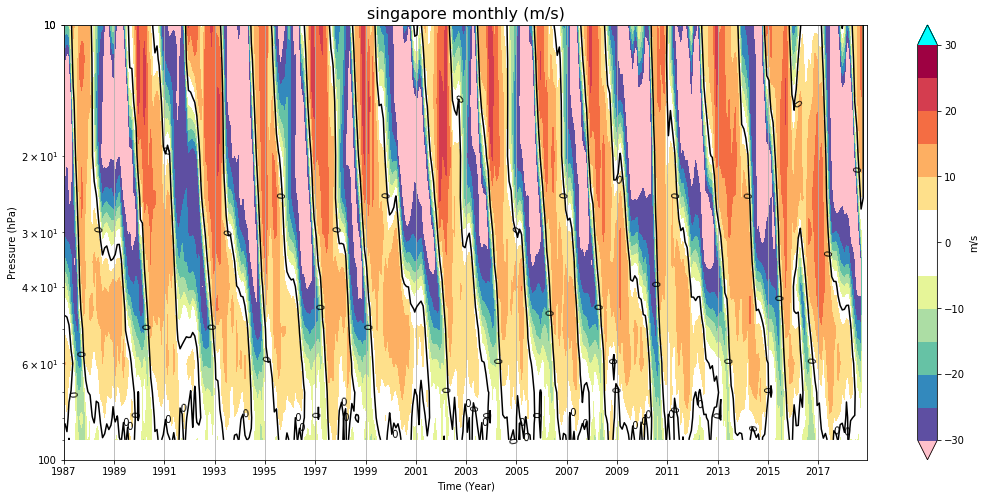

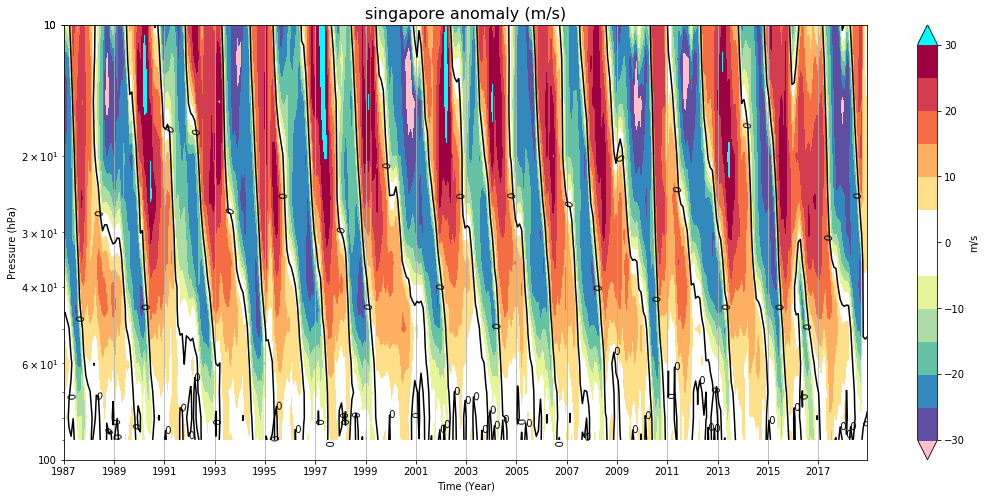

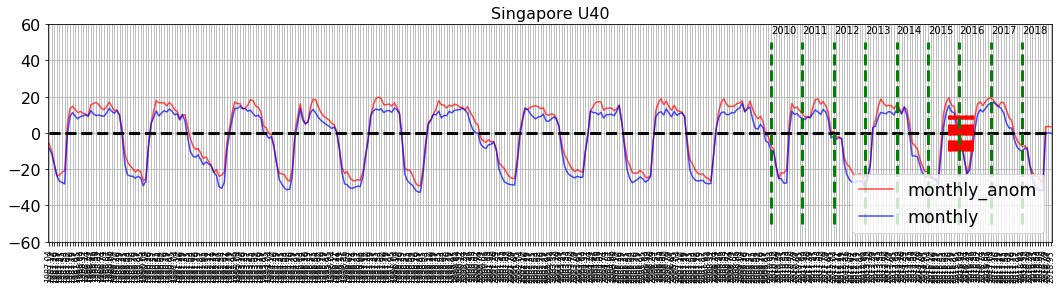

data_months_west_to_east= [[144, 180], [], [38, 122, 206, 254, 314], [231], [], [341, 353], [], [7], [], [69], [94], []]
data_months_east_to_west= [[], [], [110, 134], [27, 195, 219, 243], [52, 328], [], [], [163], [368], [273], [82, 298], [347]]


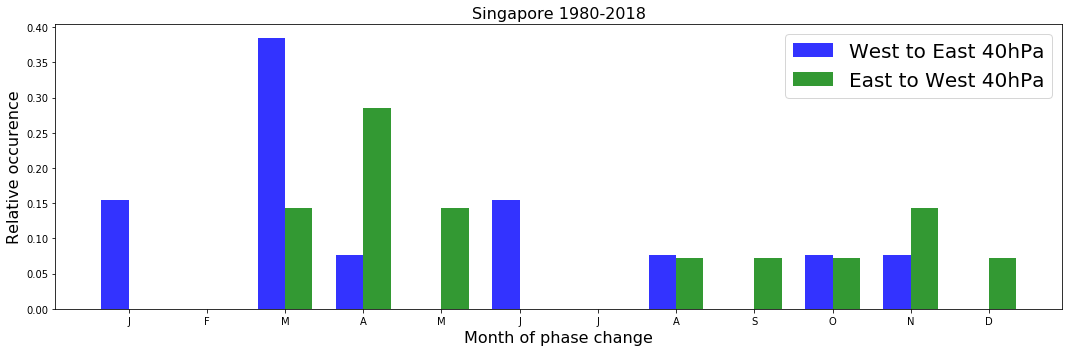

END


In [44]:
print('BEGIN')

Diag=False
nmy=12

idir='/OSM/CBR/OA_DCFP/work/col414/CAFEPP/Singapore'
ifil='singapore.dat'

#needed to look in text file to find start/end year, 1987.

cbeg_singapore=1987
cend_singapore=2018
abeg_singapore=1987
aend_singapore=2018

singapore_time_calendar='proleptic_gregorian'
singapore_time_units='days since 1980-01-01 00:00'

singapore_time_stamp_beg=[]
singapore_time_stamp_end=[]
for year in range(abeg_singapore,aend_singapore+1):
  for month in range(1,nmy+1):
    #print(year,month)
    singapore_time_stamp_beg.append(datetime.datetime(year,month,1,1) + datetime.timedelta(hours=0.0))
    if(month==12):
      singapore_time_stamp_end.append(datetime.datetime(year+1,1,1) + datetime.timedelta(hours=0.0))
    else:
      singapore_time_stamp_end.append(datetime.datetime(year,month+1,1) + datetime.timedelta(hours=0.0))
    
singapore_time_beg = netCDF4.date2num(singapore_time_stamp_beg, singapore_time_units, singapore_time_calendar)
singapore_time_end = netCDF4.date2num(singapore_time_stamp_end, singapore_time_units, singapore_time_calendar)
singapore_time_avg = (singapore_time_beg+singapore_time_end)/2.0
singapore_date_time_stamps = netCDF4.num2date(singapore_time_avg, singapore_time_units, singapore_time_calendar)
singapore_num_time_values = netCDF4.date2num(singapore_date_time_stamps, singapore_time_units, singapore_time_calendar)
singapore_year_fraction = fractional_year_from_num2date(singapore_date_time_stamps, singapore_time_calendar)

#print(singapore_year_fraction)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

singapore_levs_list=[10,12,15,20,25,30,35,40,45,50,60,70,80,90]
singapore_levs=np.array(singapore_levs_list)
singapore_years=np.arange(abeg_singapore,aend_singapore+1)
singapore_months=np.arange(1,nmy+1)

list_singapore_years = [str(singapore_year) for singapore_year in singapore_years]
list_singapore_levs = [str(singapore_lev) for singapore_lev in singapore_levs]

singapore_nyears,=singapore_years.shape
singapore_nmonths,=singapore_months.shape
singapore_nlevs,=singapore_levs.shape

singapore_ntimes=singapore_nyears*singapore_nmonths

singapore_from_monthly=ma.zeros((singapore_ntimes,singapore_nlevs),dtype=float)
#print('singapore_array.shape=',singapore_array.shape)

with open(idir+'/'+ifil) as f: 
  for cnt,line in enumerate(f):
    items=line.split()
    nitems=len(items)
    
    if(nitems==1):
      if(list_singapore_years.index(items[0])<0):
        raise SystemExit('year not within defined year range:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        singapore_year=items[0]
    else:
      #look for pressure level data lines (can have months<=12 for final year)
      try:
        singapore_time_beg=(int(singapore_year)-singapore_years[0])*nmy
        singapore_time_end=singapore_time_beg+nitems-1-1
        this_lev=list_singapore_levs.index(items[0])
        if(Diag): print(singapore_year, items, singapore_time_beg, singapore_time_end, this_lev)
        #j=[float(item) for item in items[1:]]
        #print('j=',j)
        singapore_from_monthly[singapore_time_beg:singapore_time_end+1, this_lev]= [float(item) for item in items[1:]]
        #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
        
      except:
        pass
      
singapore_from_monthly*=.1 #needs to be scaled for units of m/s.

#   raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

singapore_monthly = n_data_funcs(Diag=False, input_files=None, input_var_name=None, \
                            dummy_mode=(False, singapore_date_time_stamps, singapore_num_time_values, singapore_time_units, singapore_time_calendar))

singapore_monthly_climatology_from_monthly, singapore_monthly_anomaly_from_monthly = singapore_monthly.monthly_clim_anom( \
    Diag=False, input=singapore_from_monthly, AnnOut=False, ZeroClim=False, \
    abeg=abeg_singapore, aend=aend_singapore, cbeg=cbeg_singapore, cend=cend_singapore)

singapore_monthly_climatology_from_monthly, singapore_monthly_from_monthly = singapore_monthly.monthly_clim_anom( \
    Diag=False, input=singapore_from_monthly, AnnOut=False, ZeroClim=True, \
    abeg=abeg_singapore, aend=aend_singapore, cbeg=cbeg_singapore, cend=cend_singapore)

print('singapore_monthly_from_monthly.shape=',singapore_monthly_from_monthly.shape)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

xysize=(18,8)

#abc
clevs=None
step=5;clevs=sorted(list(set(np.arange(-30, 30+step, step).tolist())))

cmap = cmap_hero(clevs, \
              Diag=-1, \
              middle2white=True, \
              negative_infinity='pink', \
              positive_infinity='cyan', \
              first_cmap='Spectral_r', \
              first_fraction=[0,.4], \
              last_cmap='Spectral', \
              last_fraction=[0,.4], \
              first_flip=False, \
              last_flip=True)
  
shade_2d_simple(np.transpose(singapore_monthly_from_monthly), \
  title='singapore monthly', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(singapore_year_fraction, singapore_levs), \
  xysize=xysize, \
  xlab='Time (Year)', \
  ylab='Pressure (hPa)', \
  ytik=[10, 100,10], \
  ylim=[10,90], \
  xtik=range(abeg_singapore,aend_singapore+1,2), \
  grid=True, \
  clevs=clevs, \
  cmap=cmap, \
  n_contour=[0])

shade_2d_simple(np.transpose(singapore_monthly_anomaly_from_monthly), \
  title='singapore anomaly', \
  units='m/s', \
  reverse_yaxis=True, \
  yscale='log', \
  xyvals=(singapore_year_fraction, singapore_levs), \
  xysize=xysize, \
  xlab='Time (Year)', \
  ylab='Pressure (hPa)', \
  ytik=[10, 100,10], \
  ylim=[10,90], \
  xtik=range(abeg_singapore,aend_singapore+1,2), \
  grid=True, \
  clevs=clevs, \
  cmap=cmap, \
  n_contour=[0])

singapore_lev_to_plot=singapore_levs_list.index(40)
#singapore_lev_to_plot=singapore_levs_list.index(90)
#singapore_lev_to_plot=singapore_levs_list.index(60)
#singapore_lev_to_plot=singapore_levs_list.index(20)
#singapore_lev_to_plot=singapore_levs_list.index(30)

singapore_years_months=[]
for cnt in range(singapore_date_time_stamps.size):
  singapore_years_months.append(singapore_date_time_stamps[cnt].year*100+singapore_date_time_stamps[cnt].month)

#print(len(singapore_years_months))

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

dates_to_plot=((2015,9), (2015,10), (2015,11), (2015,12), (2016,1), (2016,2), (2016,3), (2016,4), (2016,5), (2016,6))

xysize=(6,4)

polygons=([singapore_year_fraction[0],singapore_year_fraction[-1],0,0,'black','--',3],)

for date_to_plot in dates_to_plot:
  year,month=date_to_plot
  YYYYMM='{0:04d}'.format(year)+'{0:02d}'.format(month)
  this_data=singapore_monthly_from_monthly[singapore_years_months.index(int(YYYYMM)),]
  this_num=this_data[singapore_lev_to_plot]
#abc
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  step=20;clevs=sorted(list(set(np.arange(-100, 100+step, step).tolist())))
  polygons = polygons + ([singapore_year_fraction[singapore_years_months.index(int(YYYYMM))],singapore_year_fraction[singapore_years_months.index(int(YYYYMM))],-10,10,'red','--',3],) #this is for adding date lines to upcoming xy plot.

  #texts.append((quantity_U[t,25],merra2_monthly_files.lev[25]-t,t,10,True,False))
texts=[]  
for singapore_date_time_stamp in singapore_date_time_stamps:
  year,month=singapore_date_time_stamp.year,singapore_date_time_stamp.month
  YYYYMM='{0:04d}'.format(year)+'{0:02d}'.format(month)
  if(month==1 and year>=singapore_ybeg and year<=singapore_yend):
    polygons = polygons + ([singapore_year_fraction[singapore_years_months.index(int(YYYYMM))],singapore_year_fraction[singapore_years_months.index(int(YYYYMM))],-50,50,'green','--',3],) #this is for adding date lines to upcoming xy plot.
    texts.append((singapore_year_fraction[singapore_years_months.index(int(YYYYMM))],55,year,10,True,False))
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
xysize=(18,4)

#xticks=year_fraction(singapore_ybeg,singapore_yend)
xticks=singapore_year_fraction

#abc

singapore_ybeg,singapore_yend=2010,2019
singapore_ybeg,singapore_yend=1987,2019

plot_xy(Diag=False, \
        input_data=(singapore_monthly_anomaly_from_monthly[:,singapore_lev_to_plot], singapore_monthly_from_monthly[:,singapore_lev_to_plot]), \
        input_xvals=(singapore_year_fraction, singapore_year_fraction), \
        grid=True, \
        title='Singapore U'+str(singapore_levs_list[singapore_lev_to_plot]), \
        units='m/s', \
        xysize=xysize, \
        xticks=xticks, \
        xticks_fontsize=8, \
        x_lab_rotation=90, \
        xlim=[singapore_ybeg,singapore_yend], \
        line_colors=['red','blue'], \
        line_labels=['monthly_anom','monthly'], \
        polygons=polygons, \
        texts=texts
       )

#singapore_lev_to_plot=singapore_levs_list.index(40)

data_sign=np.sign(singapore_monthly_from_monthly[:,singapore_levs_list.index(40)])

#print('data_sign=',data_sign)

data_sign.shape

data_sign_diff=data_sign[1:]-data_sign[0:-1]

#print('data_sign_diff=',data_sign_diff)

index_months_west_to_east,=np.where(data_sign_diff==2) #west to east (or easterly to westerly)

index_months_east_to_west,=np.where(data_sign_diff==-2) #east to west (or westerly to easterly)

#print('index_months_west_to_east=',index_months_west_to_east)

#print('index_months_east_to_west=',index_months_east_to_west)

data_months_west_to_east=[[],[],[],[],[],[],[],[],[],[],[],[]]
data_months_east_to_west=[[],[],[],[],[],[],[],[],[],[],[],[]]

for k in index_months_west_to_east:
  #print(k,merra2_monthly_files.date_time_stamp_tfreq[k].year,merra2_monthly_files.date_time_stamp_tfreq[k].month)
  data_months_west_to_east[singapore_date_time_stamps[k].month-1].append(k)
  
for k in index_months_east_to_west:
  #print(k,merra2_monthly_files.date_time_stamp_tfreq[k].year,merra2_monthly_files.date_time_stamp_tfreq[k].month)
  data_months_east_to_west[singapore_date_time_stamps[k].month-1].append(k)
  
print('data_months_west_to_east=',data_months_west_to_east)
print('data_months_east_to_west=',data_months_east_to_west)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

cnt_months_west_to_east,cnt_months_east_to_west=[],[]
for month in range(12):
  cnt_months_west_to_east.append(len(data_months_west_to_east[month]))
  cnt_months_east_to_west.append(len(data_months_east_to_west[month]))

plot_bar_data=([np.array(cnt_months_west_to_east) / np.sum(np.array(cnt_months_west_to_east)), 'b', 0.8, 'West to East '+str(singapore_levs_list[singapore_lev_to_plot])+'hPa'],)
plot_bar_data = plot_bar_data + ([np.array(cnt_months_east_to_west) / np.sum(np.array(cnt_months_east_to_west)), 'g', 0.8, 'East to West '+str(singapore_levs_list[singapore_lev_to_plot])+'hPa'],)

xlabs=['J','F','M','A','M','J','J','A','S','O','N','D']
plot_bar(Diag=False, \
          data=plot_bar_data, \
          xticks=xlabs, \
          title=['Singapore 1980-2018',16], \
          xlab=['Month of phase change',16], \
          ylab=['Relative occurence',16], \
          bar_width=0.35, \
          legend=[True,20,'best'] \
        )

print('END')

In [ ]:
   import pylab as plt
   import numpy as np
   from scipy.stats import chi2

   ### 
   fft=np.fft.fft(data) ; n=len(fft)
   abs=np.absolute(fft)**2

   ## frequencies (30min resolution)
   f_u01=np.zeros(n/2+1,float)
   f_u01=np.linspace(0,1,num=(n/2.+1))/(30*60*2)  
   ### Variance of data as power spectrum of white noise
   var=N.var(data)
   ### degrees of freedom
   M=n/2
   phi=(2*(n-1)-M/2.)/M       
   ###values of chi-squared
   chi_val_99 = chi2.isf(q=0.01/2, df=phi) #/2 for two-sided test
   chi_val_95 = chi2.isf(q=0.05/2, df=phi)

   ### normalization of power spectrum with 1/n
   plt.figure(figsize=(5,5))
   plt.plot(fft[0:n/2],abs[0:n/2]/n, color='k')  
   plt.axhline(y=(var/n)*(chi_val_99/phi),color='0.4',linestyle='--')
   plt.axhline(y=(var/n)*(chi_val_95/phi),color='0.4',linestyle='--')